# <font color=red> House Pricing Prediction - Advanced Regression

In [1]:
#import Libraries
import pandas as pd
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("test.csv")
df2=pd.read_csv("train.csv")

### <font color=blue> EDA - Exploratory Data Analysis

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df1.shape, df2.shape

((1459, 80), (1460, 81))

In [6]:
df1.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean     52.619342   554.294925  1046.117970  1156.534613   325.967786   
std     176.753926   437.260486   442.898624   398.165820   420.610226   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   219.250000   784.000000   873.500000     0.000000   
50%       0.000000   460.000000   988.000000  1079.000000     0.000000   
75%       0.000000   797.750000  1305.000000  1382.500000   676.000000   
max    1526.000000  2140.000000  5095.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000   
mean       3.543523  1486.045922      0.434454      0.065202     1.570939   
std       44.043251   485.566099      0.530648      0.252468     0.555190   
min        0.000000   407.000000      0.000000      0.000000     0.000000   
25%        0.000000  1117.500000      0.000000      0.000000     1.000000   
50%        0.000000  1432.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max     1064.000000  5095.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000   
mean      0.377656      2.854010      1.042495      6.385195     0.58122   
std       0.503017      0.829788      0.208472      1.508895     0.64742   
min       0.000000      0.000000      0.000000      3.000000     0.00000   
25%       0.000000      2.000000      1.000000      5.000000     0.00000   
50%       0.000000      3.000000      1.000000      6.000000     0.00000   
75%       1.000000      3.000000      1.000000      7.000000     1.00000   
max       2.000000      6.000000      2.000000     15.000000     4.00000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean   1977.721217     1.766118   472.768861    93.174777    48.313914   
std      26.431175     0.775945   217.048611   127.744882    68.883364   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   318.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    28.000000   
75%    2002.000000     2.000000   576.000000   168.000000    72.000000   
max    2207.000000     5.0

In [7]:
df2.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
df1.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
df2.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
df1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [11]:
df2.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [12]:
df1.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

In [13]:
df2.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [14]:
df1.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1437  2898          90       RL         65.0     8385   Pave   NaN      Reg   
1372  2833          20       RL         78.0    11645   Pave   NaN      Reg   
1179  2640          20       RL         80.0    10000   Pave   NaN      Reg   
38    1499         160       FV         24.0     2544   Pave  Pave      Reg   
1382  2843          60       RL         50.0     8340   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1437         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1372         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1179         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
38           Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1382         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1437       Norm   Duplex     1Story            6            5       1978   
1372       Norm     1Fam     1Story            8            5       2005   
1179       Norm     1Fam     1Story            6            6       1974   
38         Norm    Twnhs     2Story            7            5       2004   
1382       Norm     1Fam     2Story            6            6       1977   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1437          1978     Gable  CompShg     Plywood     Plywood       None   
1372          2006       Hip  CompShg     VinylSd     VinylSd    BrkFace   
1179          1974     Gable  CompShg     HdBoard     Plywood    BrkFace   
38            2005     Gable  CompShg     MetalSd     MetalSd       None   
1382          1977     Gable  CompShg     HdBoard     Plywood    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1437         0.0        TA        TA     CBlock       TA       TA   
1372       198.0        Gd        TA      PConc       Ex       TA   
1179       176.0        TA        TA     CBlock       TA       TA   
38           0.0        Gd        TA      PConc       Gd       TA   
1382        62.0        TA        TA     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1437           Mn          Unf         0.0          Unf         0.0   
1372           Gd          GLQ      1122.0          Unf         0.0   
1179           No          ALQ       755.0          Unf         0.0   
38             No          GLQ       368.0          ALQ        42.0   
1382           Av          GLQ       509.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1437     1664.0       1664.0    GasA        TA          Y      SBrkr   
1372      448.0       1570.0    GasA        Ex          Y      SBrkr   
1179      348.0       1103.0    GasA        TA          Y      SBrkr   
38        190.0        600.0    GasA        Ex          Y      SBrkr   
1382      166.0        675.0    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1437      1664         0             0       1664           0.0           0.0   
1372      1590         0             0       1590           1.0           0.0   
1179      1103         0             0       1103           0.0           0.0   
38         600       600             0       1200           1.0           0.0   
1382       686       702             0       1388           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1437         2         0             4             2          TA   
1372         2         1             2             1          Ex   
1179         2         0             3             1          TA   
38           2         1             2             1          Gd   
1382         1         1             3             1          TA   

   

In [15]:
df2.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
442    443          50       RM         52.0     6240   Pave   NaN      Reg   
726    727          20       RL          NaN    21695   Pave   NaN      IR1   
1404  1405          50       RL         60.0    10410   Pave  Grvl      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
317    318          60       FV         75.0     9000   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
442          Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
726          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
1404         Lvl    AllPub    Corner       Gtl      OldTown     Artery   
1440         Bnk    AllPub    Inside       Mod      Crawfor       Norm   
317          Lvl    AllPub    Inside       Gtl      Somerst       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
442        Norm     1Fam     1.5Fin            5            7       1930   
726        Norm     1Fam     1Story            6            9       1988   
1404       Norm     1Fam     1.5Fin            3            4       1915   
1440       Norm     1Fam     2.5Fin            6            7       1922   
317        Norm     1Fam     2Story            8            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
442           1992     Gable  CompShg     MetalSd     MetalSd       None   
726           2007       Hip  CompShg     Wd Sdng     Plywood    BrkFace   
1404          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1440          1994     Gable  CompShg     MetalSd     MetalSd       None   
317           2006     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
442          0.0        TA        TA      PConc       TA       TA   
726        260.0        Gd        Gd     CBlock       Gd       TA   
1404         0.0        TA        TA      PConc       TA       TA   
1440         0.0        TA        TA     BrkTil       Ex       TA   
317          0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
442            No          Unf           0          Unf           0   
726            No          GLQ         808          Unf           0   
1404           No          Unf           0          Unf           0   
1440           No          Unf           0          Unf           0   
317            Av          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
442        1078         1078    GasA        TA          Y      SBrkr   
726          72          880    GasA        Ex          Y      SBrkr   
1404        672          672    GasA        TA          Y      SBrkr   
1440        588          588    GasA        Fa          Y      SBrkr   
317        1088         1088    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
442       1128       445             0       1573             0             0   
726       1680         0             0       1680             1             0   
1404       694       520             0       1214             0             0   
1440      1423       748           384       2555             0             0   
317       1088       871             0       1959             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
442          2         0             3             1          TA   
726          2         0             3             1          Gd   
1404         1         0             3             1          TA   
1440         2         0             3             1          TA   
317          2         1             3             1          Gd   

   

In [16]:
df1.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004993     0.009930  0.051492    -0.064887   
MSSubClass     0.004993    1.000000    -0.450505 -0.359537     0.034690   
LotFrontage    0.009930   -0.450505     1.000000  0.644608     0.182870   
LotArea        0.051492   -0.359537     0.644608  1.000000     0.107989   
OverallQual   -0.064887    0.034690     0.182870  0.107989     1.000000   
OverallCond    0.009553   -0.071768    -0.092312 -0.103402    -0.095874   
YearBuilt     -0.058647    0.040848     0.122356  0.048314     0.621910   
YearRemodAdd  -0.079437    0.046319     0.092603  0.036907     0.591267   
MasVnrArea    -0.021424   -0.012186     0.251533  0.188691     0.453991   
BsmtFinSF1    -0.045966   -0.058775     0.204621  0.185470     0.322583   
BsmtFinSF2     0.015862   -0.079093     0.046824  0.054199    -0.028199   
BsmtUnfSF      0.001203   -0.111080     0.092031  0.071681     0.243070   
TotalBsmtSF   -0.039731   -0.201648     0.315802  0.283049     0.560314   
1stFlrSF      -0.017911   -0.245603     0.461239  0.456417     0.481842   
2ndFlrSF      -0.009939    0.311430    -0.036185 -0.007862     0.195869   
LowQualFinSF  -0.020007    0.005021    -0.037294 -0.012457    -0.068135   
GrLivArea     -0.025112    0.068829     0.357125  0.366324     0.558599   
BsmtFullBath  -0.031440    0.016106     0.127314  0.094052     0.215103   
BsmtHalfBath   0.006907   -0.001643    -0.042779 -0.008378    -0.041084   
FullBath      -0.063543    0.146489     0.163078  0.147871     0.507580   
HalfBath      -0.050263    0.180206     0.023850  0.079581     0.271951   
BedroomAbvGr   0.001038    0.005541     0.205100  0.181171     0.045901   
KitchenAbvGr  -0.017382    0.238016     0.016072 -0.031830    -0.134839   
TotRmsAbvGrd   0.000716    0.041294     0.344366  0.289576     0.352016   
Fireplaces    -0.035924   -0.064357     0.257037  0.282210     0.384999   
GarageYrBlt   -0.051925    0.090604     0.082069  0.018330     0.593080   
GarageCars    -0.053865   -0.052788     0.336373  0.263398     0.600831   
GarageArea    -0.050941   -0.108000     0.375581  0.315841     0.568161   
WoodDeckSF     0.015664   -0.022539     0.157426  0.158483     0.270790   
OpenPorchSF   -0.002045   -0.025421     0.179795  0.164815     0.288367   
EnclosedPorch  0.020999   -0.029051     0.013340  0.099850    -0.161339   
3SsnPorch     -0.025896   -0.029709    -0.037487 -0.001846     0.002803   
ScreenPorch    0.025566   -0.071978     0.113444  0.088712     0.022334   
PoolArea       0.049535   -0.017790     0.134232  0.140494    -0.012330   
MiscVal       -0.005744   -0.045835     0.068161  0.139071     0.033784   
MoSold         0.143358    0.011366     0.008810  0.005152    -0.008764   
YrSold        -0.974884   -0.008392    -0.025263 -0.051144    -0.012291   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.009553  -0.058647     -0.079437   -0.021424   -0.045966   
MSSubClass       -0.071768   0.040848      0.046319   -0.012186   -0.058775   
LotFrontage      -0.092312   0.122356      0.092603    0.251533    0.204621   
LotArea          -0.103402   0.048314      0.036907    0.188691    0.185470   
OverallQual      -0.095874   0.621910      0.591267    0.453991    0.322583   
OverallCond       1.000000  -0.361027      0.021668   -0.144261   -0.054720   
YearBuilt        -0.361027   1.000000      0.631696    0.312404    0.309595   
YearRemodAdd      0.021668   0.631696      1.000000    0.213937    0.175219   
MasVnrArea       -0.144261   0.312404      0.213937    1.000000    0.343267   
BsmtFinSF1       -0.054720   0.309595      0.175219    0.343267    1.000000   
BsmtFinSF2        0.043109  -0.008174     -0.056320    0.037546   -0.059522   
BsmtUnfSF        -0.139927   0.111892      0.148773    0.064672   -0.459581   
TotalBsmtSF      -0.177190   0.425447      0.304515    0.430966    0.550444   
1stFlrSF         -0.170451   0.338733      0.243793    0.446875 

In [17]:
df2.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [18]:
df=pd.concat([df1,df2],ignore_index=True)

In [19]:
df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
444   1905          20       RL         90.0    13339   Pave   NaN      IR1   
623   2084          20       RL         60.0     7200   Pave   NaN      Reg   
1111  2572         120       RM         35.0     3907   Pave   NaN      IR1   
2641  1183          60       RL        160.0    15623   Pave   NaN      IR1   
445   1906          50       RL         78.0    15600   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
444          Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
623          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1111         Bnk    AllPub    Inside       Mod      Blueste       Norm   
2641         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
445          Bnk    AllPub    Inside       Gtl      Crawfor       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
444        Norm     1Fam     1Story            6            6       1960   
623        Norm     1Fam     1Story            5            7       1954   
1111       Norm   TwnhsE     1Story            8            5       1988   
2641       Norm     1Fam     2Story           10            5       1996   
445        Norm     1Fam     1.5Fin            5            7       1949   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
444           1960     Gable  CompShg     HdBoard     Plywood      Stone   
623           1954     Gable  CompShg     MetalSd     MetalSd       None   
1111          1988     Gable  CompShg     HdBoard     HdBoard       None   
2641          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
445           2005     Gable  CompShg     BrkComm     Brk Cmn       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
444        132.0        TA        TA     CBlock       TA       TA   
623          0.0        TA        TA     CBlock       TA       TA   
1111         0.0        TA        TA     CBlock       Gd       TA   
2641         0.0        Gd        TA      PConc       Ex       TA   
445          0.0        TA        TA     BrkTil       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
444            No          LwQ        65.0          BLQ       875.0   
623            No          Unf         0.0          Unf         0.0   
1111           Gd          GLQ       577.0          Unf         0.0   
2641           Av          GLQ      2096.0          Unf         0.0   
445            No          BLQ       312.0          Rec       507.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
444       621.0       1561.0    GasA        TA          Y      SBrkr   
623       825.0        825.0    GasA        TA          Y      FuseA   
1111      427.0       1004.0    GasA        Gd          Y      SBrkr   
2641      300.0       2396.0    GasA        Ex          Y      SBrkr   
445       248.0       1067.0    GasW        Fa          N      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
444       1561         0             0       1561           1.0           0.0   
623        825         0             0        825           0.0           1.0   
1111      1020         0             0       1020           1.0           0.0   
2641      2411      2065             0       4476           1.0           0.0   
445        986       537             0       1523           1.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
444          2         0             3             1          TA   
623          1         0             2             1          TA   
1111         1         0             1             1          TA   
2641         3         1             4             1          Ex   
445          2         0             3             1          Fa   

   

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [21]:
df.shape

(2919, 81)

In [22]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [23]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [24]:
abs(df.corr()['SalePrice']).sort_values(ascending=False)
#we take the corr inbetween 20% and 90%

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

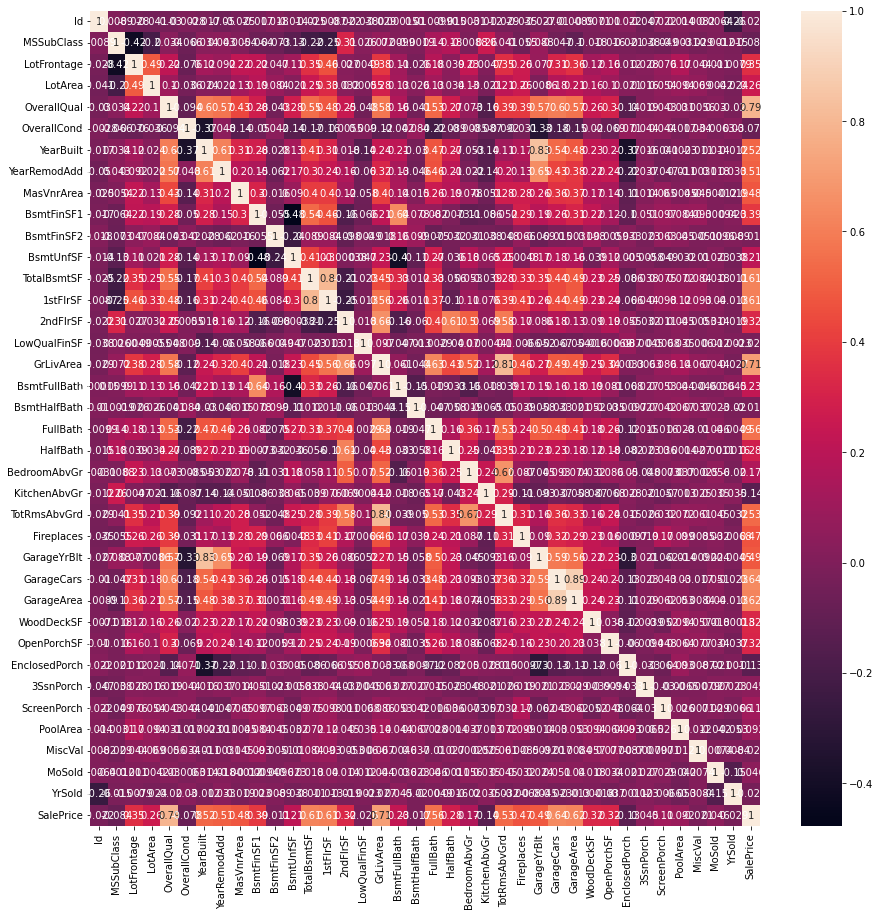

In [25]:
ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(),annot = True);

### <font color=green> Data Visualization

In [26]:
# fill empty rows

In [27]:
df["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

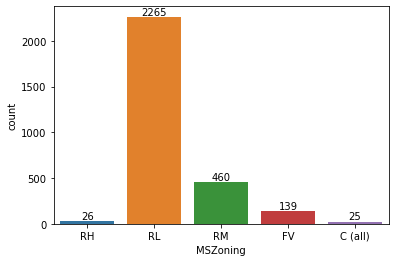

In [28]:
ax=sns.countplot(x=df["MSZoning"])
ax.bar_label(ax.containers[0]);
# we can see that most of them are RL and only 4 values are missing, so we assume they are also RL

In [29]:
#replace empty values with "RL"
df["MSZoning"].fillna("RL",inplace=True)

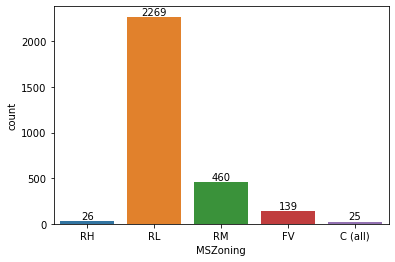

In [30]:
ax=sns.countplot(x=df["MSZoning"])
ax.bar_label(ax.containers[0]);

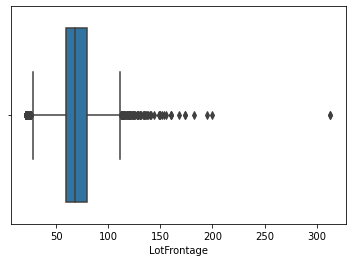

In [31]:
sns.boxplot(x=df["LotFrontage"]);

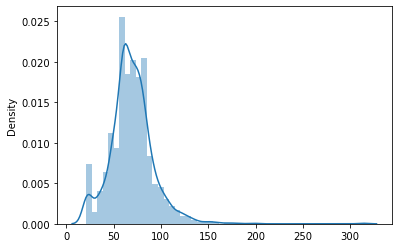

In [32]:
sns.distplot(x=df["LotFrontage"]);

In [33]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(),inplace=True)

In [34]:
df.LotFrontage.isnull().sum()
#LotFrontage has on empty values

0

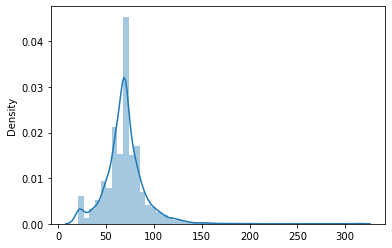

In [35]:
sns.distplot(x=df["LotFrontage"]);

<AxesSubplot:xlabel='LotFrontage'>

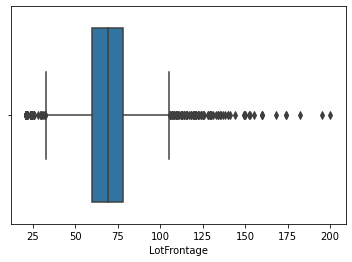

In [36]:
#ignore values above 230
df=df[df["LotFrontage"]<230]
sns.boxplot(df.LotFrontage)

In [37]:
df.SaleType.value_counts()

WD       2524
New       238
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

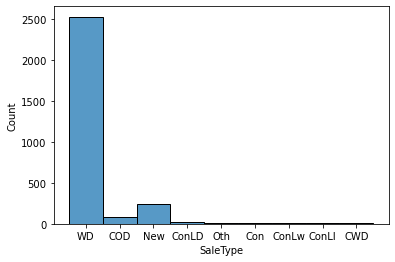

In [38]:
sns.histplot(df["SaleType"]);

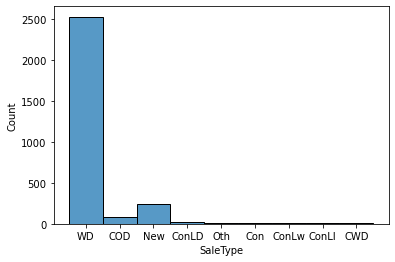

In [39]:
df["SaleType"].fillna("WD",inplace=True)
sns.histplot(df["SaleType"]);

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2917 non-null   int64  
 1   MSSubClass     2917 non-null   int64  
 2   MSZoning       2917 non-null   object 
 3   LotFrontage    2917 non-null   float64
 4   LotArea        2917 non-null   int64  
 5   Street         2917 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2917 non-null   object 
 8   LandContour    2917 non-null   object 
 9   Utilities      2915 non-null   object 
 10  LotConfig      2917 non-null   object 
 11  LandSlope      2917 non-null   object 
 12  Neighborhood   2917 non-null   object 
 13  Condition1     2917 non-null   object 
 14  Condition2     2917 non-null   object 
 15  BldgType       2917 non-null   object 
 16  HouseStyle     2917 non-null   object 
 17  OverallQual    2917 non-null   int64  
 18  OverallC

In [41]:
df.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2433   975          70       RL    60.000000    11414   Pave   NaN      IR1   
784   2245         180       RM    21.000000     1596   Pave   NaN      Reg   
1835   377          85       RL    57.000000     8846   Pave   NaN      IR1   
2854  1396          60       RL    88.000000    12665   Pave   NaN      IR1   
196   1657         160       RL    24.000000     2364   Pave   NaN      Reg   
1028  2489          20       RL    91.000000    11375   Pave   NaN      Reg   
568   2029         160       FV    24.000000     2280   Pave  Pave      Reg   
1256  2717          60       FV   114.000000     8314   Pave  Pave      IR1   
1116  2577          70       RM    50.000000     9060   Pave   NaN      Reg   
2434   976         160       FV    69.305795     2651   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2433         Lvl    AllPub    Corner       Gtl      BrkSide       RRAn   
784          Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1835         Lvl    AllPub   CulDSac       Gtl      CollgCr       Norm   
2854         Lvl    AllPub    Inside       Gtl       Timber       Norm   
196          Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1028         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
568          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1256         Lvl    AllPub    Corner       Gtl      Somerst       Norm   
1116         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
2434         Lvl    AllPub       FR2       Gtl      Somerst       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2433      Feedr     1Fam     2Story            7            8       1910   
784        Norm    Twnhs       SLvl            4            6       1973   
1835       Norm     1Fam     SFoyer            5            5       1996   
2854       Norm     1Fam     2Story            8            5       2005   
196        Norm   TwnhsE     2Story            6            5       1978   
1028       Norm     1Fam     1Story            6            5       1954   
568        Norm    Twnhs     2Story            6            5       1999   
1256       Norm     1Fam     2Story            7            5       1997   
1116       Norm     1Fam     2Story            5            6       1923   
2434       Norm    Twnhs     2Story            7            5       2000   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2433          1993     Gable  CompShg     HdBoard     HdBoard       None   
784           1973     Gable  CompShg     CemntBd     CmentBd       None   
1835          1996     Gable  CompShg     VinylSd     VinylSd       None   
2854          2006       Hip  CompShg     VinylSd     VinylSd    BrkFace   
196           1978     Gable  CompShg     Plywood     Brk Cmn       None   
1028          1995     Gable  CompShg     VinylSd     VinylSd       None   
568           1999     Gable  CompShg     MetalSd     MetalSd      Stone   
1256          1998       Hip  CompShg     Wd Sdng     Wd Sdng       None   
1116          1999     Gable  CompShg     Wd Sdng     Plywood       None   
2434          2000     Gable  CompShg     MetalSd     MetalSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2433         0.0        TA        Gd     BrkTil       Gd       TA   
784          0.0        TA        TA     CBlock       Gd       TA   
1835         0.0        Gd        TA      PConc       Gd       TA   
2854       245.0        Gd        TA      PConc       Gd       Gd   
196          0.0        TA        TA     CBlock       Gd       TA   
1028         0.0        TA        TA     CBlock       TA       TA   
568        216.0        TA        TA      PConc       Gd       TA   
1256         0.0        Gd        TA      PConc       Gd       TA   
1116         0.0        TA  

In [42]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            2719
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

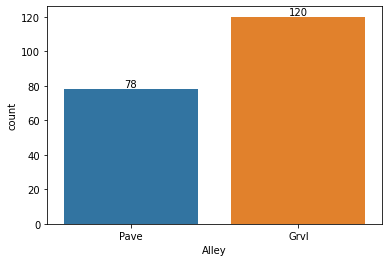

In [43]:
ax=sns.countplot(df["Alley"])
ax.bar_label(ax.containers[0]);

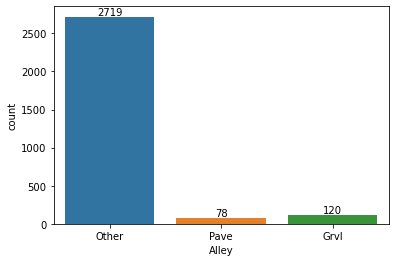

In [44]:
df.Alley.fillna("Other",inplace=True)
ax=sns.countplot(df["Alley"])
ax.bar_label(ax.containers[0]);

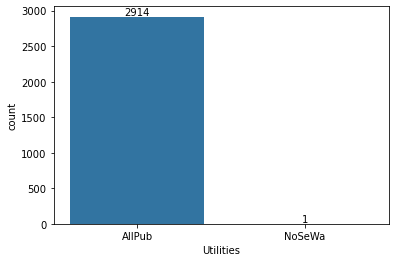

In [45]:
ax=sns.countplot(df["Utilities"])
ax.bar_label(ax.containers[0]);

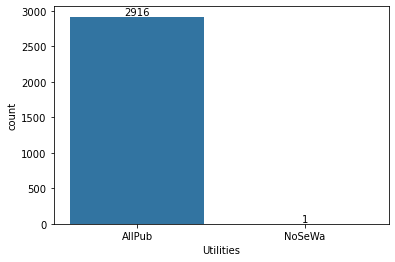

In [46]:
df.Utilities.fillna("AllPub",inplace=True)
ax=sns.countplot(df["Utilities"])
ax.bar_label(ax.containers[0]);

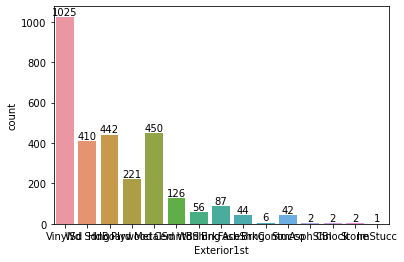

In [47]:
ax=sns.countplot(df["Exterior1st"])
ax.bar_label(ax.containers[0]);

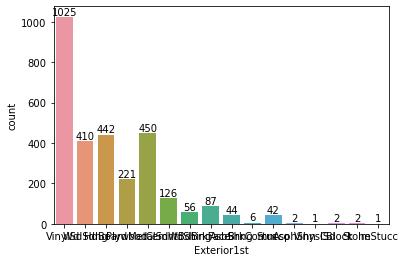

In [48]:
df.Exterior1st.fillna("VinyslSd",inplace=True)
ax=sns.countplot(df["Exterior1st"])
ax.bar_label(ax.containers[0]);

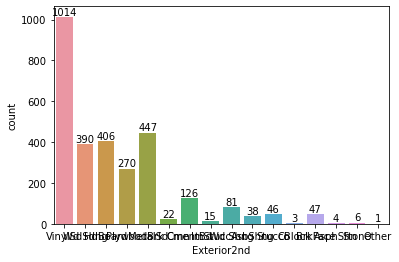

In [49]:
ax=sns.countplot(df["Exterior2nd"])
ax.bar_label(ax.containers[0]);

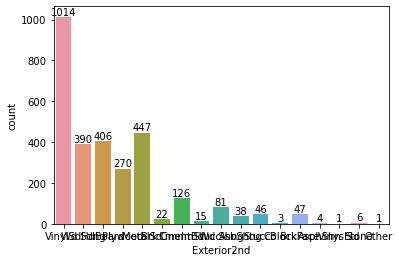

In [50]:
df.Exterior2nd.fillna("VinyslSd",inplace=True)
ax=sns.countplot(df["Exterior2nd"])
ax.bar_label(ax.containers[0]);

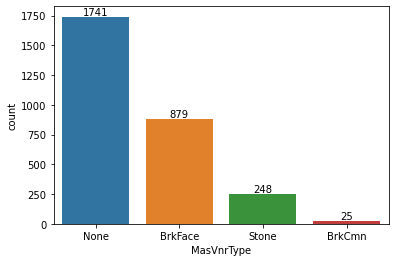

In [51]:
ax=sns.countplot(df["MasVnrType"])
ax.bar_label(ax.containers[0]);

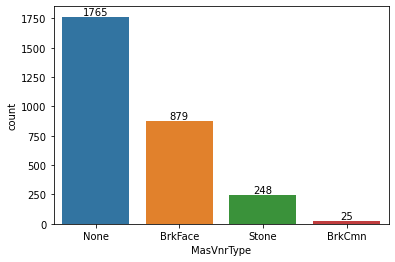

In [52]:
df.MasVnrType.fillna("None",inplace=True)
ax=sns.countplot(df["MasVnrType"])
ax.bar_label(ax.containers[0]);

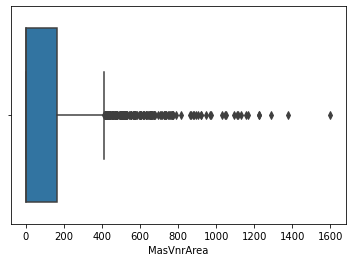

In [53]:
sns.boxplot(df["MasVnrArea"]);

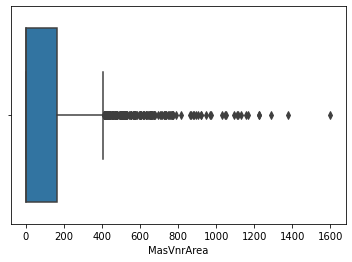

In [54]:
df["MasVnrArea"].fillna(df["MasVnrArea"].mean(),inplace=True)
sns.boxplot(df["MasVnrArea"]);

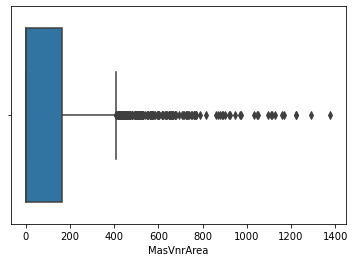

In [55]:
#ignore values above 1400
df=df[df["MasVnrArea"]<1400]
sns.boxplot(df["MasVnrArea"]);

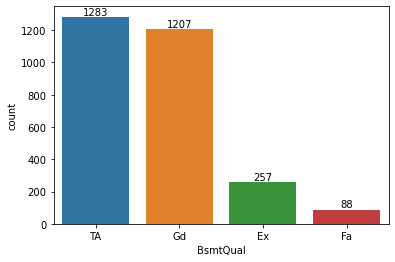

In [56]:
ax=sns.countplot(df["BsmtQual"])
ax.bar_label(ax.containers[0]);

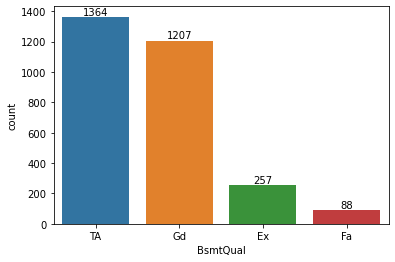

In [57]:
df.BsmtQual.fillna("TA",inplace=True)
ax=sns.countplot(df["BsmtQual"])
ax.bar_label(ax.containers[0]);

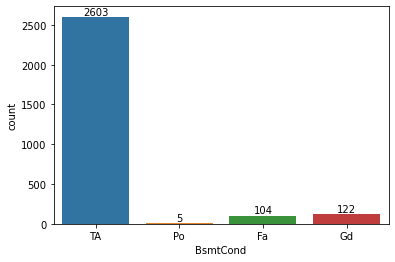

In [58]:
ax=sns.countplot(df["BsmtCond"])
ax.bar_label(ax.containers[0]);

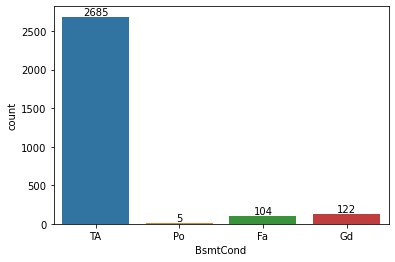

In [59]:
df.BsmtCond.fillna("TA",inplace=True)
ax=sns.countplot(df["BsmtCond"])
ax.bar_label(ax.containers[0]);

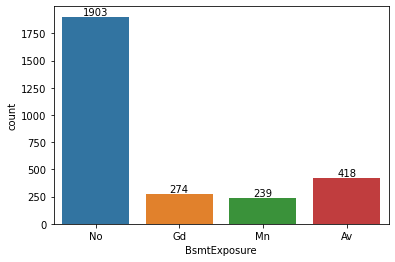

In [60]:
ax=sns.countplot(df["BsmtExposure"])
ax.bar_label(ax.containers[0]);

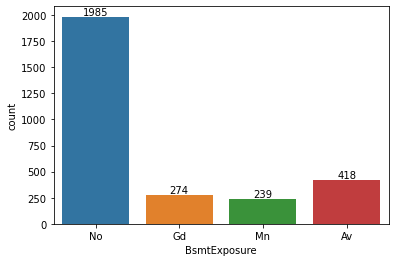

In [61]:
df.BsmtExposure.fillna("No",inplace=True)
ax=sns.countplot(df["BsmtExposure"])
ax.bar_label(ax.containers[0]);

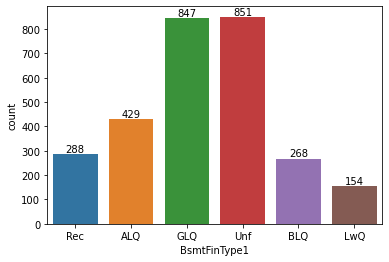

In [62]:
ax=sns.countplot(df["BsmtFinType1"])
ax.bar_label(ax.containers[0]);

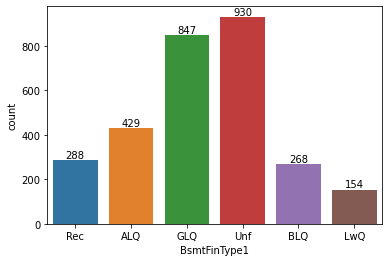

In [63]:
df.BsmtFinType1.fillna("Unf",inplace=True)
ax=sns.countplot(df["BsmtFinType1"])
ax.bar_label(ax.containers[0]);

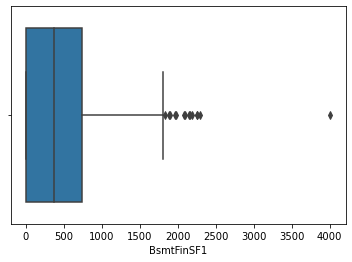

In [64]:
sns.boxplot(df["BsmtFinSF1"]);

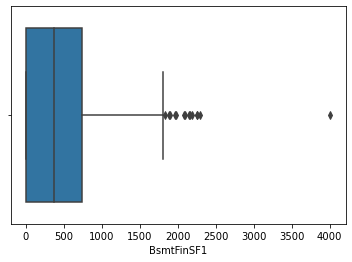

In [65]:
df.BsmtFinSF1.fillna(df.BsmtFinSF1.mean(),inplace=True)
sns.boxplot(df["BsmtFinSF1"]);

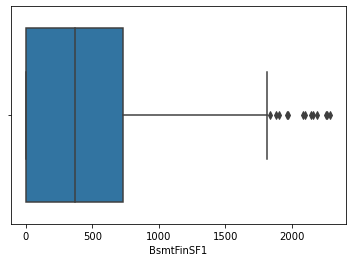

In [66]:
df=df[df["BsmtFinSF1"]<2500]
sns.boxplot(df["BsmtFinSF1"]);

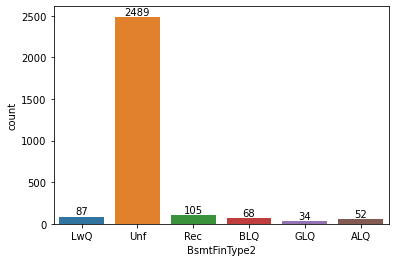

In [67]:
ax=sns.countplot(df["BsmtFinType2"])
ax.bar_label(ax.containers[0]);

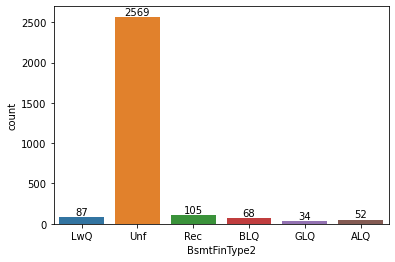

In [68]:
df.BsmtFinType2.fillna("Unf",inplace=True)
ax=sns.countplot(df["BsmtFinType2"])
ax.bar_label(ax.containers[0]);

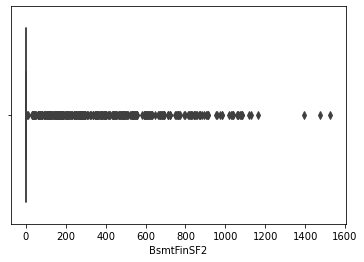

In [69]:
sns.boxplot(df["BsmtFinSF2"]);

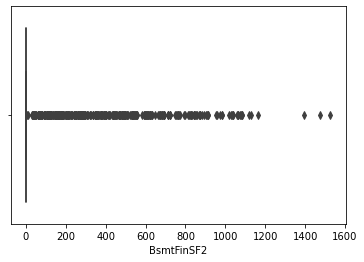

In [70]:
df.BsmtFinSF2.fillna(df.BsmtFinSF2.mean(),inplace=True)
sns.boxplot(df["BsmtFinSF2"]);

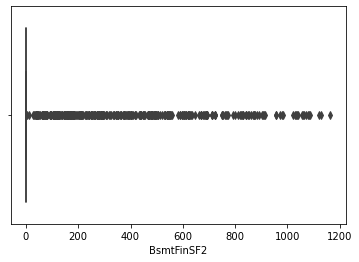

In [71]:
df=df[df["BsmtFinSF2"]<1200]
sns.boxplot(df["BsmtFinSF2"]);

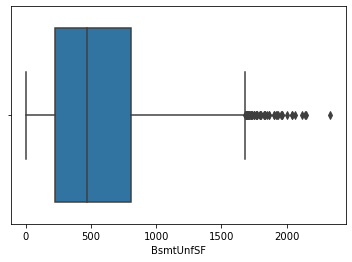

In [72]:
sns.boxplot(df["BsmtUnfSF"]);

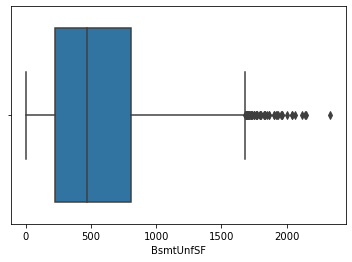

In [73]:
df.BsmtUnfSF.fillna(df.BsmtUnfSF.mean(),inplace=True)
sns.boxplot(df["BsmtUnfSF"]);

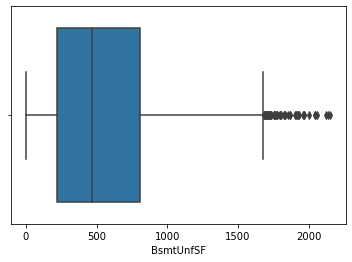

In [74]:
df=df[df["BsmtUnfSF"]<2300]
sns.boxplot(df["BsmtUnfSF"]);

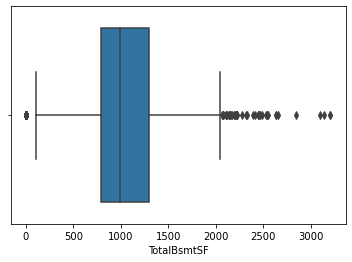

In [75]:
sns.boxplot(df["TotalBsmtSF"]);

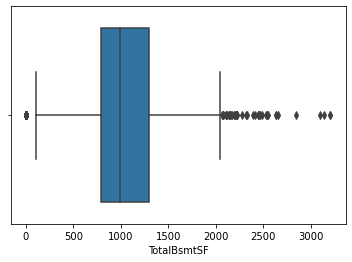

In [76]:
df.TotalBsmtSF.fillna(df["TotalBsmtSF"].mean(),inplace=True)
sns.boxplot(df["TotalBsmtSF"]);

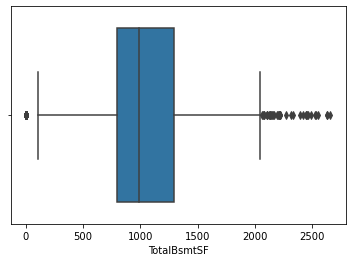

In [77]:
df=df[df["TotalBsmtSF"]<2700]
sns.boxplot(df["TotalBsmtSF"]);

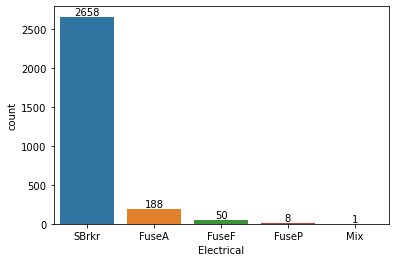

In [78]:
ax=sns.countplot(df["Electrical"])
ax.bar_label(ax.containers[0]);

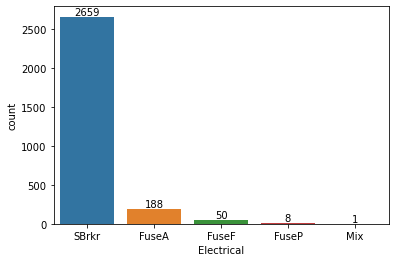

In [79]:
df.Electrical.fillna("SBrkr",inplace=True)
ax=sns.countplot(df["Electrical"])
ax.bar_label(ax.containers[0]);

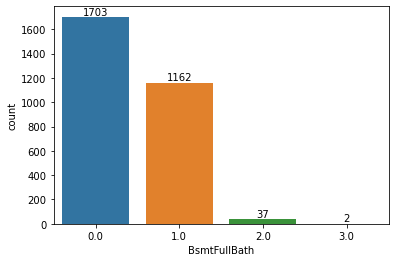

In [80]:
ax=sns.countplot(df["BsmtFullBath"])
ax.bar_label(ax.containers[0]);

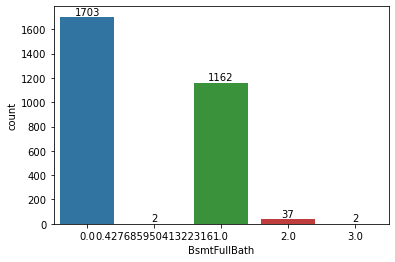

In [81]:
df.BsmtFullBath.fillna(df["BsmtFullBath"].mean(),inplace=True)
ax=sns.countplot(df["BsmtFullBath"])
ax.bar_label(ax.containers[0]);

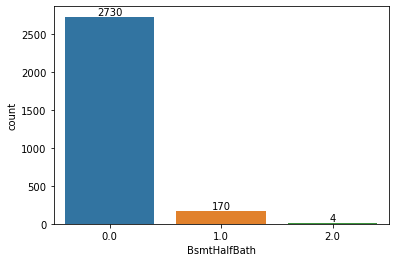

In [82]:
ax=sns.countplot(df["BsmtHalfBath"])
ax.bar_label(ax.containers[0]);

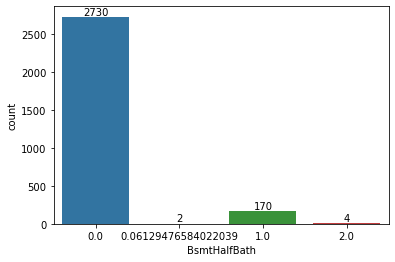

In [83]:
df.BsmtHalfBath.fillna(df["BsmtHalfBath"].mean(),inplace=True)
ax=sns.countplot(df["BsmtHalfBath"])
ax.bar_label(ax.containers[0]);

In [84]:
df.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
2472  1014          30       RM    60.000000     7200   Pave  Other      Reg   
2020   562          20       RL    77.000000    10010   Pave  Other      Reg   
2471  1013          70       RL    55.000000    10592   Pave  Other      Reg   
2687  1229         120       RL    65.000000     8769   Pave  Other      Reg   
2287   829          60       RL    69.305795    28698   Pave  Other      IR2   
1059  2520          60       RL    43.000000    12352   Pave  Other      IR2   
2769  1311          20       RL   100.000000    17500   Pave  Other      Reg   
1920   462          70       RL    60.000000     7200   Pave  Other      Reg   
158   1619          20       RL    76.000000    12887   Pave  Other      Reg   
2035   577          50       RL    52.000000     6292   Pave  Other      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2472         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
2020         Lvl    AllPub    Inside       Mod      Mitchel       Norm   
2471         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
2687         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
2287         Low    AllPub   CulDSac       Sev      ClearCr       Norm   
1059         Lvl    AllPub   CulDSac       Gtl      CollgCr       Norm   
2769         Lvl    AllPub    Inside       Gtl      Crawfor       PosA   
1920         Lvl    AllPub    Inside       Gtl        SWISU      Feedr   
158          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2035         Lvl    AllPub    Inside       Gtl        SWISU       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2472       Norm     1Fam     1Story            5            4       1910   
2020       Norm     1Fam     1Story            5            5       1974   
2471       Norm     1Fam     2Story            6            7       1923   
2687       Norm   TwnhsE     1Story            9            5       2008   
2287       Norm     1Fam     2Story            5            5       1967   
1059       Norm     1Fam     2Story            7            5       1998   
2769       Norm     1Fam     1Story            7            8       1959   
1920       Norm     1Fam     2Story            7            9       1936   
158        Norm     1Fam     1Story            5            7       1984   
2035       Norm     1Fam     1.5Fin            7            7       1928   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2472          2006       Hip  CompShg     MetalSd      Stucco       None   
2020          1975     Gable  CompShg     HdBoard     HdBoard       None   
2471          1996       Hip  CompShg     Wd Sdng     Wd Sdng       None   
2687          2008       Hip  CompShg     MetalSd     MetalSd    BrkFace   
2287          1967      Flat  Tar&Grv     Plywood     Plywood       None   
1059          1999     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2769          2002     Gable  CompShg     BrkFace     HdBoard       None   
1920          2007     Gable  CompShg     Wd Sdng     Wd Sdng       None   
158           1984     Gable  CompShg     VinylSd     VinylSd       None   
2035          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2472         0.0        TA        TA     BrkTil       TA       TA   
2020         0.0        TA        TA     CBlock       Gd       TA   
2471         0.0        TA        Gd      PConc       TA       Fa   
2687       766.0        Ex        TA      PConc       Ex       TA   
2287         0.0        TA        TA      PConc       TA       Gd   
1059       290.0        Gd        TA      PConc       Gd       TA   
2769         0.0        Gd        Gd      PConc       Gd       TA   
1920         0.0        Gd        Gd      PConc       Gd       Gd   
158          0.0 

In [85]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

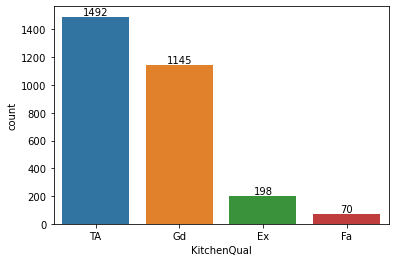

In [86]:
ax=sns.countplot(df["KitchenQual"])
ax.bar_label(ax.containers[0]);

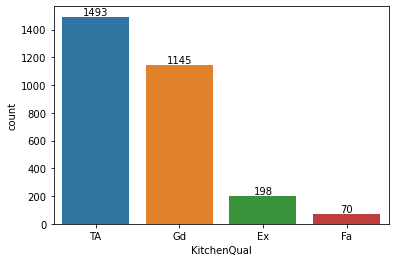

In [87]:
df.KitchenQual.fillna("TA",inplace=True)
ax=sns.countplot(df["KitchenQual"])
ax.bar_label(ax.containers[0]);

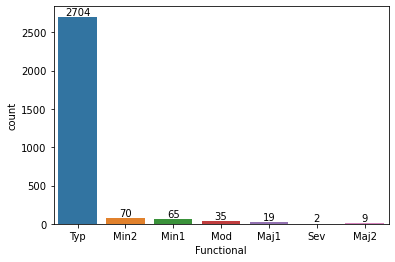

In [88]:
ax=sns.countplot(df["Functional"])
ax.bar_label(ax.containers[0]);

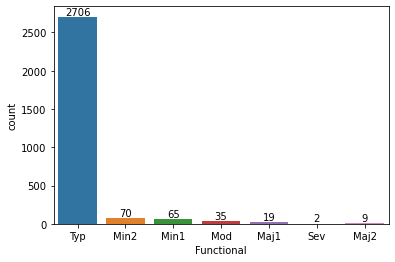

In [89]:
df.Functional.fillna("Typ",inplace=True)
ax=sns.countplot(df["Functional"])
ax.bar_label(ax.containers[0]);

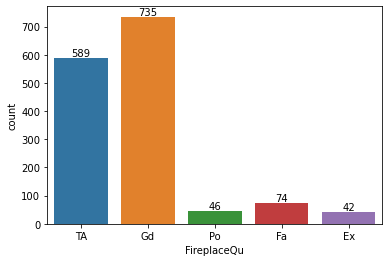

In [90]:
ax=sns.countplot(df["FireplaceQu"])
ax.bar_label(ax.containers[0]);

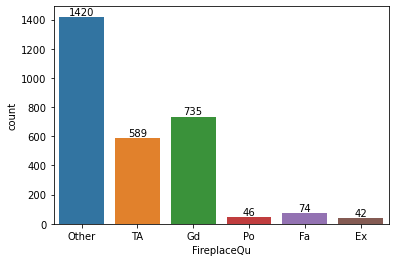

In [91]:
df.FireplaceQu.fillna("Other",inplace=True)
ax=sns.countplot(df["FireplaceQu"])
ax.bar_label(ax.containers[0]);

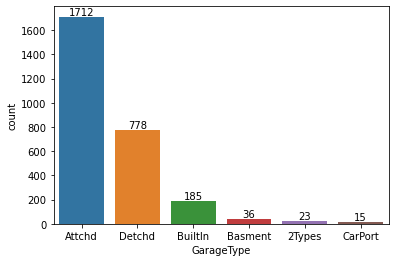

In [92]:
ax=sns.countplot(df["GarageType"])
ax.bar_label(ax.containers[0]);

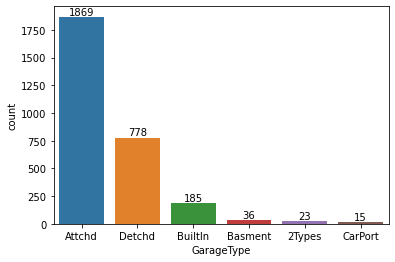

In [93]:
df.GarageType.fillna("Attchd",inplace=True)
ax=sns.countplot(df["GarageType"])
ax.bar_label(ax.containers[0]);

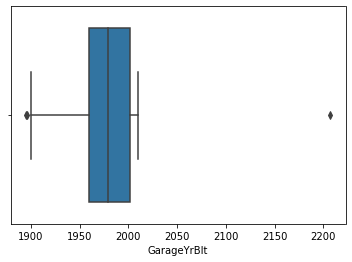

In [94]:
sns.boxplot(df["GarageYrBlt"]);

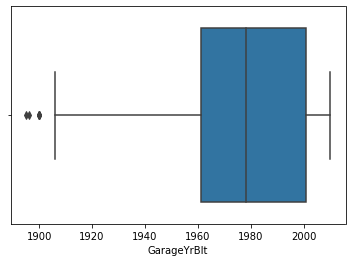

In [95]:
df.GarageYrBlt.fillna(df.GarageYrBlt.mean(),inplace=True)
df=df[df["GarageYrBlt"]<2022]
sns.boxplot(df["GarageYrBlt"]);

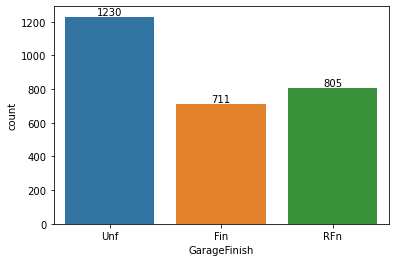

In [96]:
ax=sns.countplot(df["GarageFinish"])
ax.bar_label(ax.containers[0]);

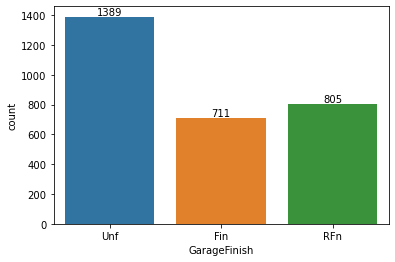

In [97]:
df.GarageFinish.fillna("Unf",inplace=True)
ax=sns.countplot(df["GarageFinish"])
ax.bar_label(ax.containers[0]);

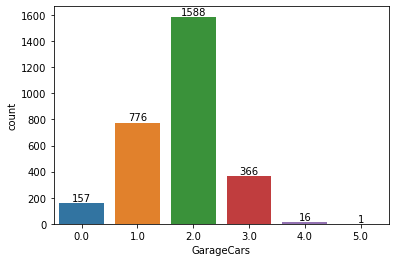

In [98]:
ax=sns.countplot(df["GarageCars"])
ax.bar_label(ax.containers[0]);

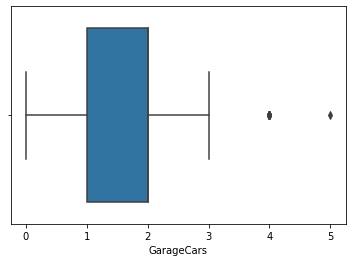

In [99]:
sns.boxplot(df["GarageCars"]);

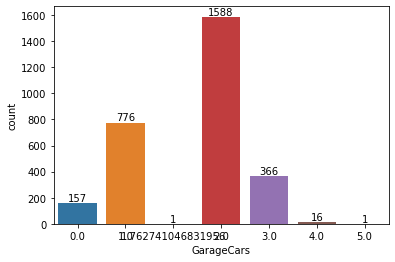

In [100]:
df.GarageCars.fillna(df["GarageCars"].mean(),inplace=True)
ax=sns.countplot(df["GarageCars"])
ax.bar_label(ax.containers[0]);

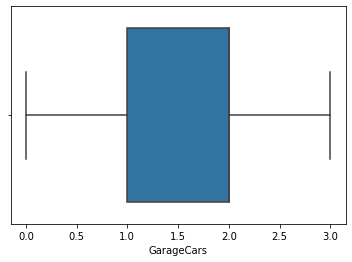

In [101]:
df=df[df["GarageCars"]<4]
sns.boxplot(df["GarageCars"]);

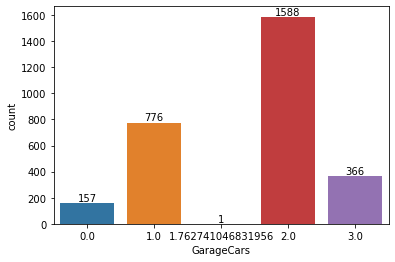

In [102]:
ax=sns.countplot(df["GarageCars"])
ax.bar_label(ax.containers[0]);

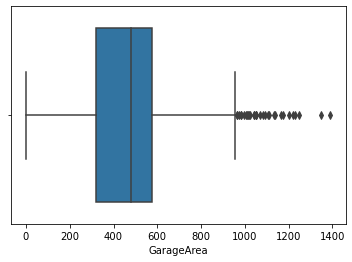

In [103]:
sns.boxplot(df["GarageArea"]);

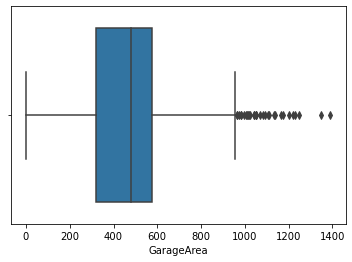

In [104]:
df.GarageArea.fillna(df.GarageArea.mean(),inplace=True)
sns.boxplot(df["GarageArea"]);

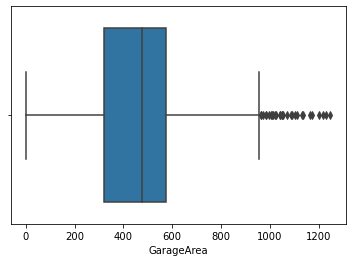

In [105]:
df=df[df["GarageArea"]<1300]
sns.boxplot(df["GarageArea"]);

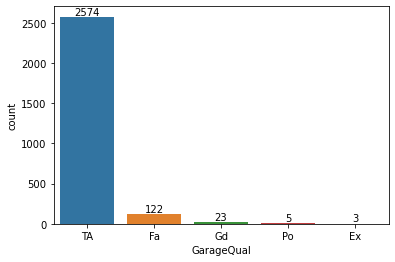

In [106]:
ax=sns.countplot(df["GarageQual"])
ax.bar_label(ax.containers[0]);

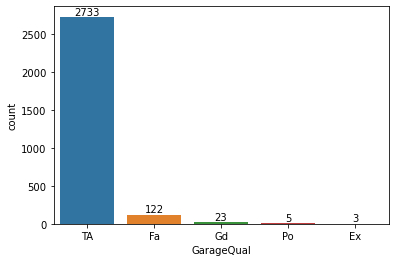

In [107]:
df.GarageQual.fillna("TA",inplace=True)
ax=sns.countplot(df["GarageQual"])
ax.bar_label(ax.containers[0]);

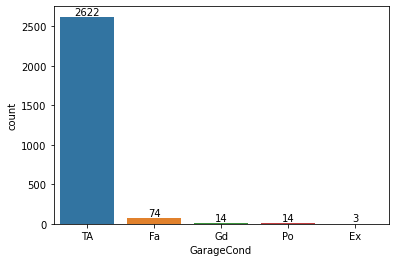

In [108]:
ax=sns.countplot(df["GarageCond"])
ax.bar_label(ax.containers[0]);

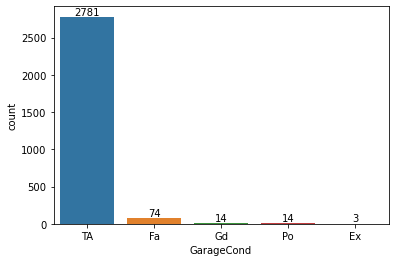

In [109]:
df.GarageCond.fillna("TA",inplace=True)
ax=sns.countplot(df["GarageCond"])
ax.bar_label(ax.containers[0]);

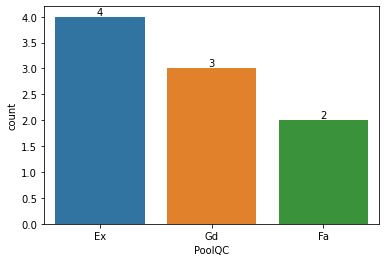

In [110]:
ax=sns.countplot(df["PoolQC"])
ax.bar_label(ax.containers[0]);

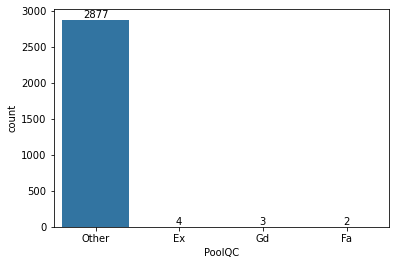

In [111]:
df.PoolQC.fillna("Other",inplace=True)
ax=sns.countplot(df["PoolQC"])
ax.bar_label(ax.containers[0]);

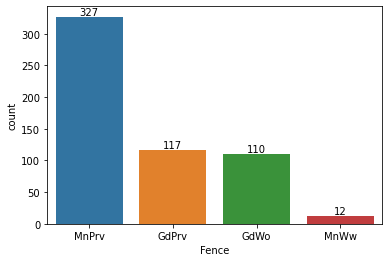

In [112]:
ax=sns.countplot(df["Fence"])
ax.bar_label(ax.containers[0]);

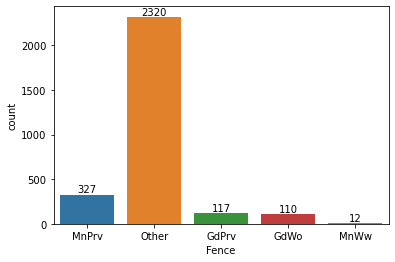

In [113]:
df.Fence.fillna("Other",inplace=True)
ax=sns.countplot(df["Fence"])
ax.bar_label(ax.containers[0]);

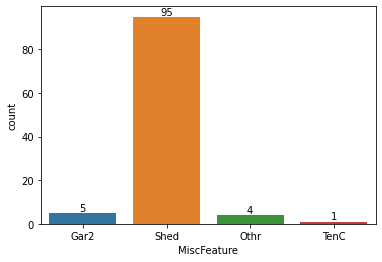

In [114]:
ax=sns.countplot(df["MiscFeature"])
ax.bar_label(ax.containers[0]);

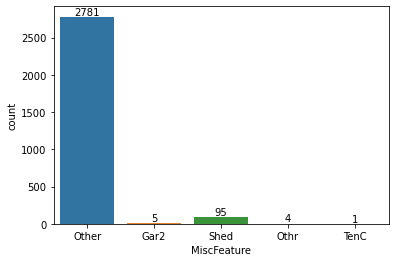

In [115]:
df.MiscFeature.fillna("Other",inplace=True)
ax=sns.countplot(df["MiscFeature"])
ax.bar_label(ax.containers[0]);

In [117]:
df.isnull().sum()
#all rows except SalePrice are now not empty

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2886 non-null   int64  
 1   MSSubClass     2886 non-null   int64  
 2   MSZoning       2886 non-null   object 
 3   LotFrontage    2886 non-null   float64
 4   LotArea        2886 non-null   int64  
 5   Street         2886 non-null   object 
 6   Alley          2886 non-null   object 
 7   LotShape       2886 non-null   object 
 8   LandContour    2886 non-null   object 
 9   Utilities      2886 non-null   object 
 10  LotConfig      2886 non-null   object 
 11  LandSlope      2886 non-null   object 
 12  Neighborhood   2886 non-null   object 
 13  Condition1     2886 non-null   object 
 14  Condition2     2886 non-null   object 
 15  BldgType       2886 non-null   object 
 16  HouseStyle     2886 non-null   object 
 17  OverallQual    2886 non-null   int64  
 18  OverallC

In [119]:
df.sample(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
563   2024          60       RL    69.305795     9205   Pave  Other      IR1   
1582   124         120       RL    55.000000     7892   Pave  Other      Reg   
2803  1345          60       RL    85.000000    11103   Pave  Other      IR1   
662   2123          30       RM    69.305795     6120   Pave  Other      Reg   
2571  1113          20       RL    73.000000     7100   Pave  Other      IR1   
503   1964         160       RM    21.000000     1680   Pave  Other      Reg   
202   1663          20       RL    95.000000    12350   Pave  Other      Reg   
808   2269          20       RL    69.305795    10960   Pave  Other      IR1   
1535    77          20       RL    69.305795     8475   Pave  Other      IR1   
2448   990          60       FV    65.000000     8125   Pave  Other      Reg   
2507  1049          20       RL   100.000000    21750   Pave  Other      Reg   
2334   876          60       FV    75.000000     9000   Pave  Other      Reg   
1099  2560          50       RL    51.000000     6821   Pave  Other      Reg   
908   2369         120       FV    30.000000     5330   Pave   Pave      IR2   
4     1465         120       RL    43.000000     5005   Pave  Other      IR1   
1464     6          50       RL    85.000000    14115   Pave  Other      IR1   
2219   761          20       RL    70.000000     9100   Pave  Other      Reg   
2073   615         180       RM    21.000000     1491   Pave  Other      Reg   
380   1841          90       RL    69.305795    10547   Pave  Other      IR1   
820   2281         120       RH    33.000000     4113   Pave  Other      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
563          Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
1582         Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
2803         Lvl    AllPub    Corner       Gtl      CollgCr       Norm   
662          Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
2571         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
503          Lvl    AllPub    Inside       Gtl       BrDale       Norm   
202          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
808          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1535         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
2448         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
2507         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2334         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1099         HLS    AllPub    Inside       Gtl      Crawfor       Norm   
908          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
1464         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2219         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
2073         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
380          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
820          Lvl    AllPub    Inside       Gtl        NAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
563        Norm     1Fam     2Story            6            5       1990   
1582       Norm   TwnhsE     1Story            6            5       1993   
2803       Norm     1Fam     2Story            7            5       2006   
662        Norm     1Fam     1Story            5            6       1945   
2571       Norm     1Fam     1Story            5            7       1957   
503        Norm    Twnhs     2Story            5            5       1972   
202        Norm     1Fam     1Story            9            5       2008   
808        Norm     1Fam     1Story            6            5       1984   
1535       Norm     1Fam     1Story            4            7       1956   
2448       N

In [139]:
df.select_dtypes("object_")

MSZoning Street  Alley LotShape LandContour Utilities LotConfig  \
0          RH   Pave  Other      Reg         Lvl    AllPub    Inside   
1          RL   Pave  Other      IR1         Lvl    AllPub    Corner   
2          RL   Pave  Other      IR1         Lvl    AllPub    Inside   
3          RL   Pave  Other      IR1         Lvl    AllPub    Inside   
4          RL   Pave  Other      IR1         HLS    AllPub    Inside   
...       ...    ...    ...      ...         ...       ...       ...   
2914       RL   Pave  Other      Reg         Lvl    AllPub    Inside   
2915       RL   Pave  Other      Reg         Lvl    AllPub    Inside   
2916       RL   Pave  Other      Reg         Lvl    AllPub    Inside   
2917       RL   Pave  Other      Reg         Lvl    AllPub    Inside   
2918       RL   Pave  Other      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl        NAmes      Feedr       Norm     1Fam     1Story   
1          Gtl        NAmes       Norm       Norm     1Fam     1Story   
2          Gtl      Gilbert       Norm       Norm     1Fam     2Story   
3          Gtl      Gilbert       Norm       Norm     1Fam     2Story   
4          Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   
...        ...          ...        ...        ...      ...        ...   
2914       Gtl      Gilbert       Norm       Norm     1Fam     2Story   
2915       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
2916       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
2917       Gtl        NAmes       Norm       Norm     1Fam     1Story   
2918       Gtl      Edwards       Norm       Norm     1Fam     1Story   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
0        Gable  CompShg     VinylSd     VinylSd       None        TA   
1          Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace        TA   
2        Gable  CompShg     VinylSd     VinylSd       None        TA   
3        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
4        Gable  CompShg     HdBoard     HdBoard       None        Gd   
...        ...      ...         ...         ...        ...       ...   
2914     Gable  CompShg     VinylSd     VinylSd       None        TA   
2915     Gable  CompShg     Plywood     Plywood      Stone        TA   
2916     Gable  CompShg     CemntBd     CmentBd       None        Ex   
2917       Hip  CompShg     MetalSd     MetalSd       None        TA   
2918     Gable  CompShg     HdBoard     HdBoard       None        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA     CBlock       TA       TA           No          Rec   
1           TA     CBlock       TA       TA           No          ALQ   
2           TA      PConc       Gd       TA           No          GLQ   
3           TA      PConc       TA       TA           No          GLQ   
4           TA      PConc       Gd       TA           No          ALQ   
...        ...        ...      ...      ...          ...          ...   
2914        TA      PConc       Gd       TA           No          Unf   
2915        TA     CBlock       Gd       TA           No          ALQ   
2916        Gd      Stone       TA       Gd           No          GLQ   
2917        TA     CBlock       TA       TA           Mn          GLQ   
2918        TA     CBlock       TA       TA           No          BLQ   

     BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
0             LwQ    GasA        TA          Y      SBrkr          TA   
1             Unf    GasA        TA          Y      SBrkr          Gd   
2             Unf    GasA        Gd          Y      SBrkr          TA   
3             Unf    GasA        Ex          Y      SBrkr          Gd   
4             Unf    GasA        Ex          Y      SBrkr          Gd   
...           ...     ...       ...        ...        ...         ...   
2914      

In [148]:
df["SaleCondition"].value_counts()

Normal     2377
Partial     240
Abnorml     189
Family       46
Alloca       22
AdjLand      12
Name: SaleCondition, dtype: int64

In [125]:
df["MSZoning"].value_counts()

RL         2242
RM          455
FV          138
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [126]:
df["Street"].value_counts()

Pave    2874
Grvl      12
Name: Street, dtype: int64

In [127]:
df["Alley"].value_counts()

Other    2691
Grvl      119
Pave       76
Name: Alley, dtype: int64

In [128]:
df["LotShape"].value_counts()

Reg    1841
IR1     955
IR2      75
IR3      15
Name: LotShape, dtype: int64

In [129]:
df["LandContour"].value_counts()

Lvl    2596
HLS     117
Bnk     114
Low      59
Name: LandContour, dtype: int64

In [130]:
df["Utilities"].value_counts()

AllPub    2885
NoSeWa       1
Name: Utilities, dtype: int64

In [131]:
df["LotConfig"].value_counts()

Inside     2106
Corner      507
CulDSac     174
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [132]:
df["LandSlope"].value_counts()

Gtl    2748
Mod     122
Sev      16
Name: LandSlope, dtype: int64

In [133]:
df["Neighborhood"].value_counts()

NAmes      440
CollgCr    266
OldTown    237
Edwards    191
Somerst    181
Gilbert    165
NridgHt    160
Sawyer     151
NWAmes     130
SawyerW    119
Mitchel    109
BrkSide    107
Crawfor    103
IDOTRR      93
Timber      71
NoRidge     68
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [134]:
df["Condition1"].value_counts()

Norm      2486
Feedr      161
Artery      90
RRAn        50
PosN        37
RRAe        28
PosA        19
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [135]:
df["Condition2"].value_counts()

Norm      2857
Feedr       13
Artery       5
PosA         4
PosN         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [136]:
df["CentralAir"].value_counts()

Y    2691
N     195
Name: CentralAir, dtype: int64

In [140]:
df.shape

(2886, 81)

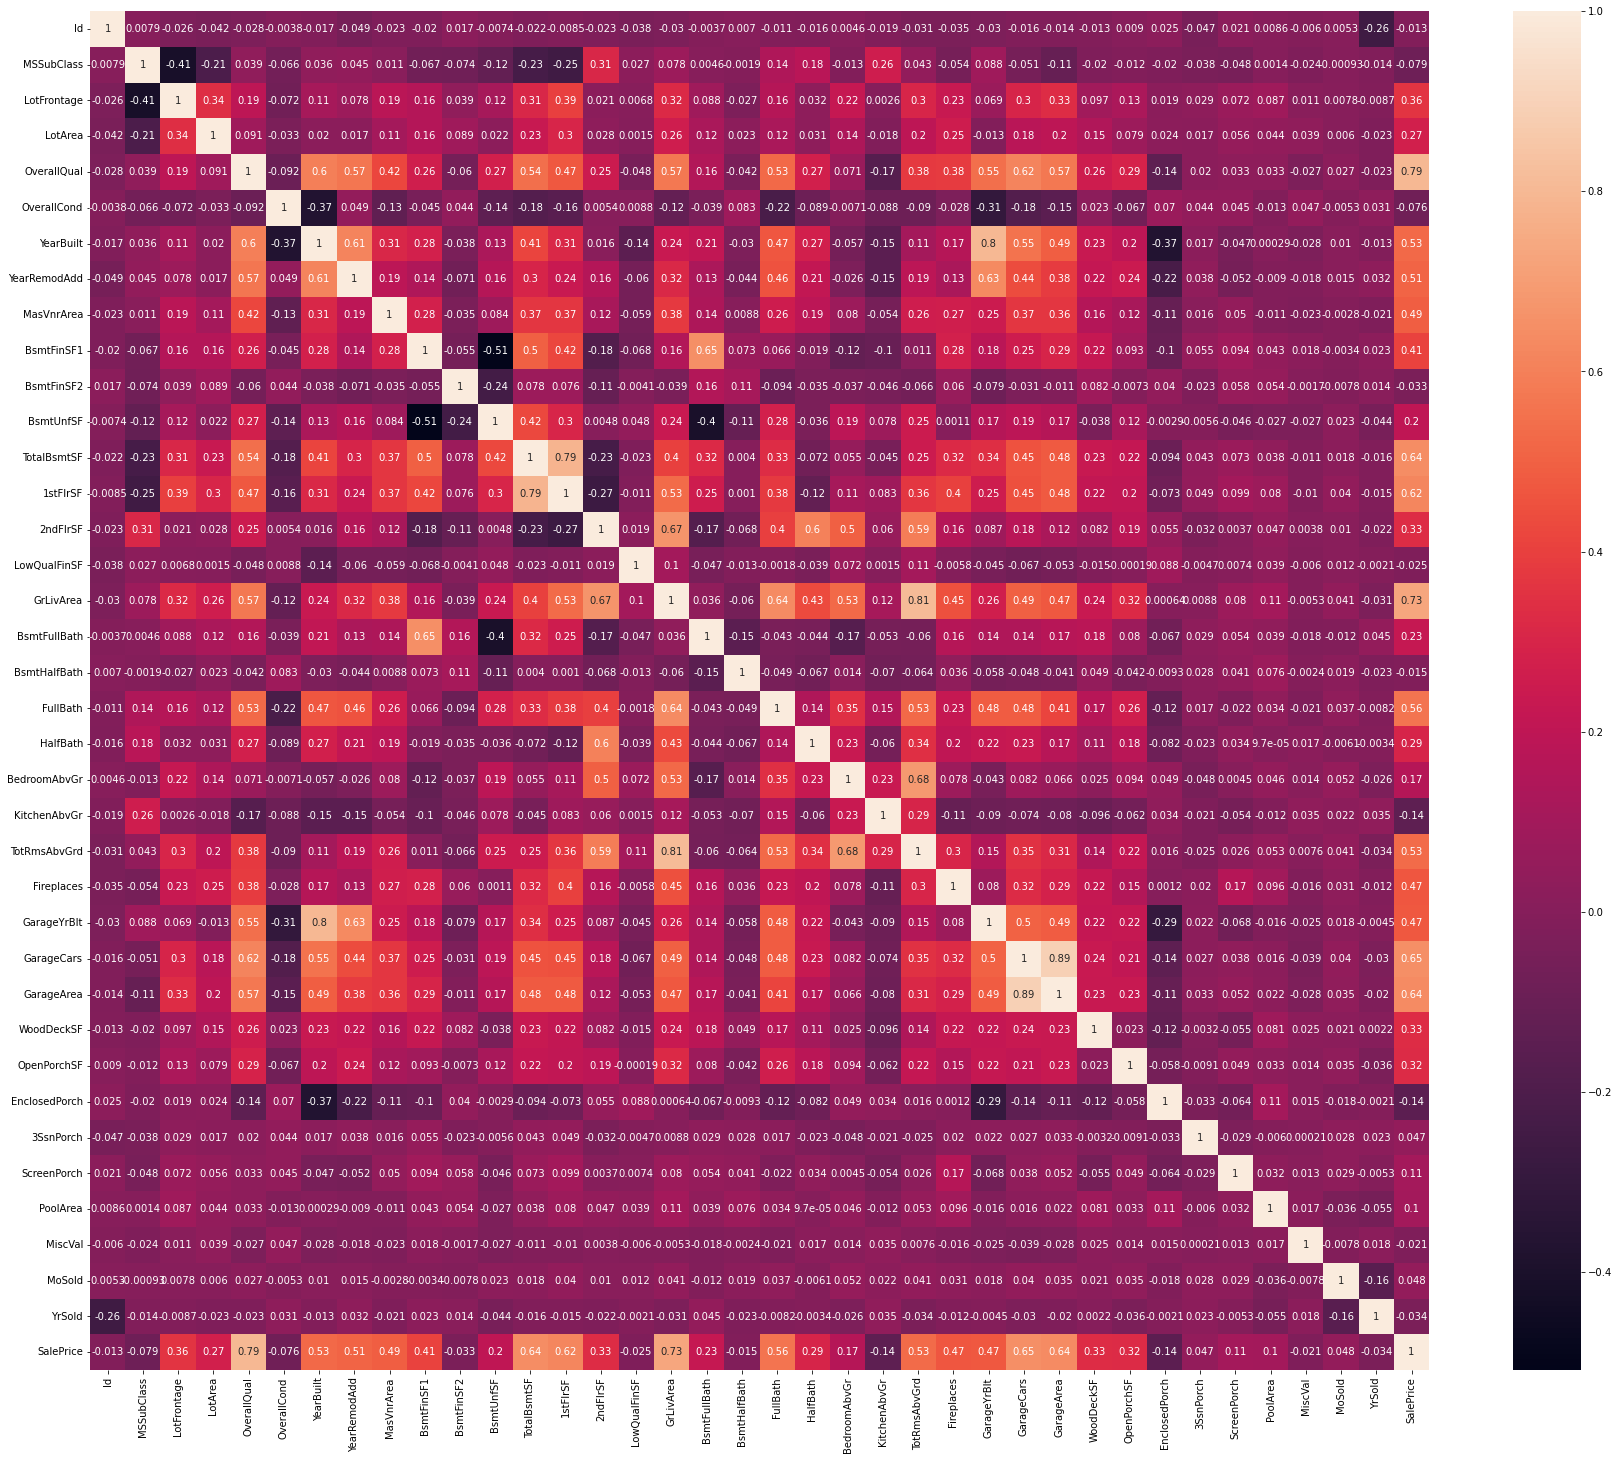

In [144]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True);

In [145]:
abs(df.corr()["SalePrice"].sort_values(ascending=False))
# >20% and <90%

SalePrice        1.000000
OverallQual      0.794359
GrLivArea        0.733261
GarageCars       0.650252
TotalBsmtSF      0.643010
GarageArea       0.637182
1stFlrSF         0.622329
FullBath         0.561540
TotRmsAbvGrd     0.533584
YearBuilt        0.527356
YearRemodAdd     0.507671
MasVnrArea       0.489877
GarageYrBlt      0.472557
Fireplaces       0.467026
BsmtFinSF1       0.407317
LotFrontage      0.359698
2ndFlrSF         0.330509
WoodDeckSF       0.329996
OpenPorchSF      0.323652
HalfBath         0.293520
LotArea          0.269825
BsmtFullBath     0.226821
BsmtUnfSF        0.202874
BedroomAbvGr     0.168652
ScreenPorch      0.105191
PoolArea         0.101856
MoSold           0.047686
3SsnPorch        0.046642
Id               0.013343
BsmtHalfBath     0.015196
MiscVal          0.020540
LowQualFinSF     0.024660
BsmtFinSF2       0.032761
YrSold           0.034353
OverallCond      0.075896
MSSubClass       0.078689
KitchenAbvGr     0.139401
EnclosedPorch    0.144626
Name: SalePr

In [ ]:
# Data Visualization

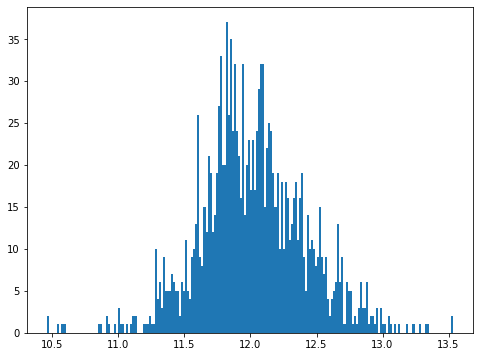

In [146]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df.SalePrice)), bins=200);

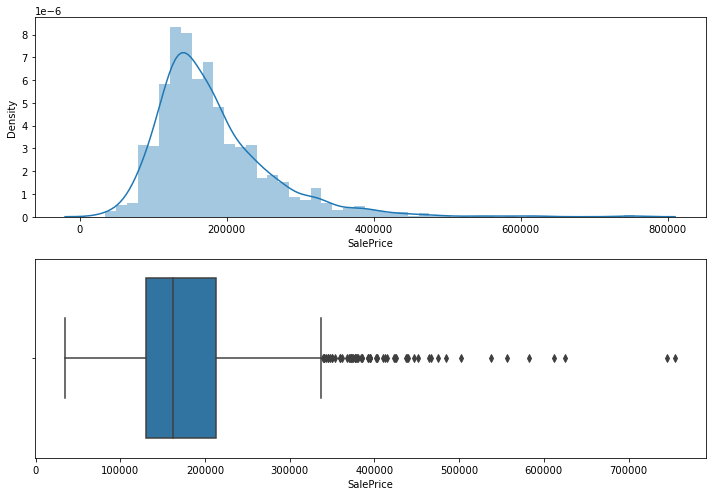

In [147]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['SalePrice'])
fig.add_subplot(2,1,2)
sns.boxplot(df['SalePrice'])
plt.tight_layout();

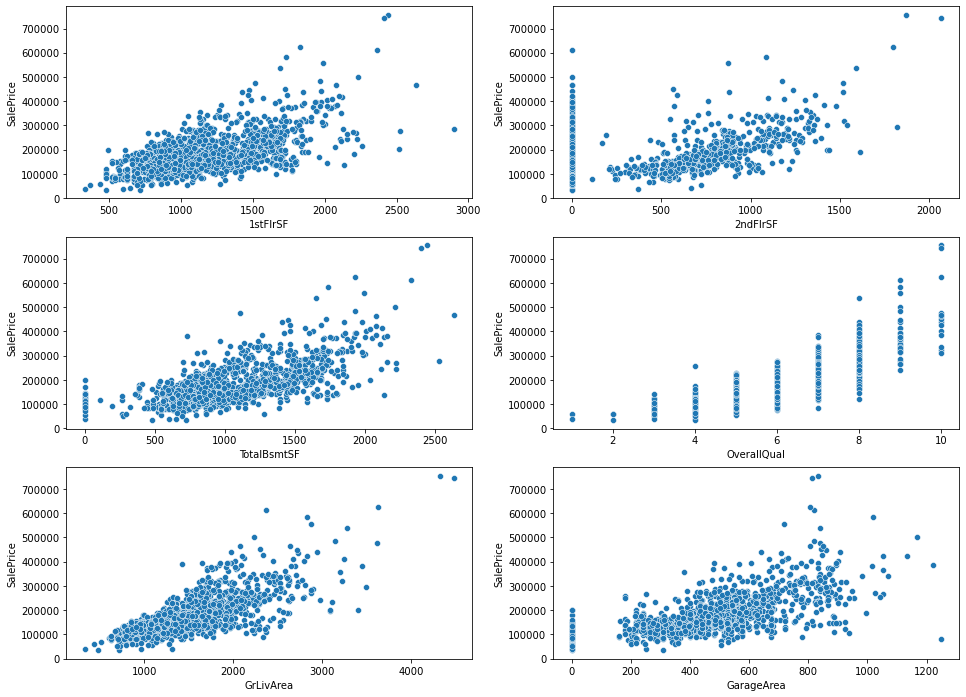

In [162]:
fig = plt.figure(figsize=(16,12))
fig.add_subplot(3,2,1)
sns.scatterplot(df['1stFlrSF'], df['SalePrice'])
fig.add_subplot(3,2,2)
sns.scatterplot(df['2ndFlrSF'],df['SalePrice'])
fig.add_subplot(3,2,3)
sns.scatterplot(df['TotalBsmtSF'],df['SalePrice'])
fig.add_subplot(3,2,4)
sns.scatterplot(df['OverallQual'],df['SalePrice']);
fig.add_subplot(3,2,5)
sns.scatterplot(df['GrLivArea'],df['SalePrice'])
fig.add_subplot(3,2,6)
sns.scatterplot(df['GarageArea'],df['SalePrice']);

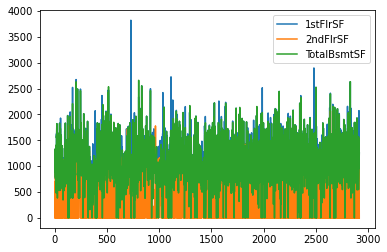

In [169]:
df['1stFlrSF'].plot(), df['2ndFlrSF'].plot(), df['TotalBsmtSF'].plot()
plt.legend();

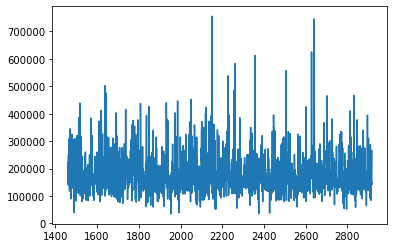

In [172]:
df.SalePrice.plot();

<AxesSubplot:>

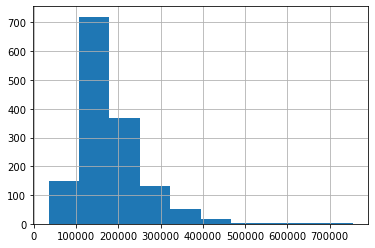

In [173]:
df.SalePrice.hist()

### Feature Engineering

In [178]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2885.000000  2885.000000  2885.000000    2885.000000  2885.000000   
mean   1459.391681    57.180243    68.941239   10097.327903     6.075217   
std     842.936113    42.578093    20.152271    7784.389057     1.397526   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     731.000000    20.000000    60.000000    7441.000000     5.000000   
50%    1458.000000    50.000000    69.305795    9428.000000     6.000000   
75%    2191.000000    70.000000    78.000000   11500.000000     7.000000   
max    2919.000000   190.000000   195.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2885.000000  2885.000000   2885.000000  2885.000000  2885.000000   
mean      5.567418  1971.154593   1984.171924    99.484552   434.861204   
std       1.115727    30.270401     20.909095   172.352587   436.761205   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.000000   
75%       6.000000  2001.000000   2004.000000   160.000000   728.000000   
max       9.000000  2010.000000   2010.000000  1378.000000  2288.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2885.000000  2885.000000  2885.000000  2885.000000  2885.000000   
mean     47.915650   559.684338  1042.460192  1151.138648   334.460312   
std     162.262314   436.620584   414.232486   372.799809   424.873738   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   221.000000   789.000000   874.000000     0.000000   
50%       0.000000   468.000000   988.000000  1079.000000     0.000000   
75%       0.000000   801.000000  1296.000000  1380.000000   703.000000   
max    1164.000000  2153.000000  2660.000000  3820.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2885.000000  2885.000000   2885.000000   2885.000000  2885.000000   
mean       4.749740  1490.348700      0.423867      0.060354     1.562218   
std       46.666697   486.101584      0.518733      0.243855     0.546735   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1122.000000      0.000000      0.000000     1.000000   
50%        0.000000  1440.000000      0.000000      0.000000     2.000000   
75%        0.000000  1737.000000      1.000000      0.000000     2.000000   
max     1064.000000  4476.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2885.000000   2885.000000   2885.000000   2885.000000  2885.000000   
mean      0.377816      2.855113      1.042288      6.428076     0.591334   
std       0.499716      0.815811      0.209716      1.547707     0.642136   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2885.000000  2885.000000  2885.000000  2885.000000  2885.000000   
mean   1977.891752     1.748618   467.677383    92.717158    47.164645   
std      24.543405     0.741280   208.755545   125.010312    66.649347   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   319.000000     0.000000     0.000000   
50%    1978.023298     2.000000   478.000000     0.000000    27.000000   
75%    2001.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [174]:
df['age']=2022-df['YearBuilt']

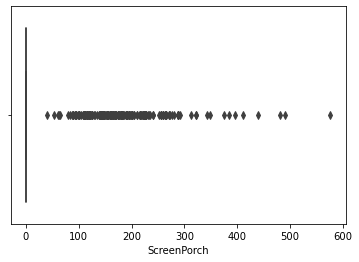

In [176]:
sns.boxplot(df["ScreenPorch"])
df=df[df["ScreenPorch"]<500]

In [179]:
df.quantile(.97).astype('int')

Id                 2831
MSSubClass          160
LotFrontage         112
LotArea           19924
OverallQual           9
OverallCond           8
YearBuilt          2007
YearRemodAdd       2008
MasVnrArea          530
BsmtFinSF1         1386
BsmtFinSF2          584
BsmtUnfSF          1585
TotalBsmtSF        1858
1stFlrSF           1946
2ndFlrSF           1225
LowQualFinSF          0
GrLivArea          2585
BsmtFullBath          1
BsmtHalfBath          1
FullBath              2
HalfBath              1
BedroomAbvGr          4
KitchenAbvGr          2
TotRmsAbvGrd         10
Fireplaces            2
GarageYrBlt        2008
GarageCars            3
GarageArea          880
WoodDeckSF          386
OpenPorchSF         214
EnclosedPorch       213
3SsnPorch             0
ScreenPorch         192
PoolArea              0
MiscVal             400
MoSold               12
YrSold             2010
SalePrice        371914
age                 112
Name: 0.97, dtype: int32

In [181]:
#outliers
outliers = df.quantile(.97)
df = df[(df['SalePrice']<outliers['SalePrice'])]
df = df[(df['TotalBsmtSF']<outliers['TotalBsmtSF'])]
df = df[(df['1stFlrSF']<outliers['1stFlrSF'])]

In [183]:
df = df[(df['2ndFlrSF']<outliers['2ndFlrSF'])]
df = df[(df['EnclosedPorch']<outliers['EnclosedPorch'])]
df = df[(df['OpenPorchSF']<outliers['OpenPorchSF'])]
df = df[(df['WoodDeckSF']<outliers['WoodDeckSF'])]

In [187]:
df = df[(df['GrLivArea']<outliers['GrLivArea'])]

In [184]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1228.000000  1228.000000  1228.000000    1228.000000  1228.000000   
mean    729.271173    57.646580    67.878525    9666.924267     5.933225   
std     421.696276    43.185114    19.155678    7016.298546     1.275602   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     371.750000    20.000000    60.000000    7226.750000     5.000000   
50%     732.500000    50.000000    69.305795    9135.000000     6.000000   
75%    1091.250000    70.000000    76.000000   11075.000000     7.000000   
max    1459.000000   190.000000   182.000000  159000.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1228.000000  1228.000000   1228.000000  1228.000000  1228.000000   
mean      5.581433  1970.902280   1984.074919    84.997542   406.353420   
std       1.105980    29.471054     20.897489   148.079981   395.104796   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1965.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1992.500000     0.000000   369.000000   
75%       6.000000  2000.000000   2004.000000   130.500000   675.000000   
max       9.000000  2009.000000   2010.000000  1129.000000  1619.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1228.000000  1228.000000  1228.000000  1228.000000  1228.000000   
mean     39.879479   548.050489   994.283388  1098.899023   310.201140   
std     144.466193   419.994319   359.149765   313.151686   392.039639   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   212.000000   780.000000   864.000000     0.000000   
50%       0.000000   462.500000   952.000000  1050.000000     0.000000   
75%       0.000000   792.250000  1220.250000  1310.000000   698.000000   
max    1127.000000  1800.000000  1845.000000  1898.000000  1218.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1228.000000  1228.000000   1228.000000   1228.000000  1228.000000   
mean       5.333876  1414.434039      0.400651      0.058632     1.516287   
std       45.644699   410.570247      0.509790      0.241866     0.526923   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1096.000000      0.000000      0.000000     1.000000   
50%        0.000000  1392.000000      0.000000      0.000000     2.000000   
75%        0.000000  1679.250000      1.000000      0.000000     2.000000   
max      528.000000  3086.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1228.000000   1228.000000   1228.000000   1228.000000  1228.000000   
mean      0.360749      2.802117      1.047231      6.278502     0.542345   
std       0.497089      0.777073      0.223444      1.438994     0.614149   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     0.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      6.000000      3.000000     12.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1228.000000  1228.000000  1228.000000  1228.000000  1228.000000   
mean   1977.882549     1.686482   447.420195    79.252443    37.389251   
std      23.827468     0.709865   199.007876   100.918236    48.885559   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1962.000000     1.000000   308.000000     0.000000     0.000000   
50%    1978.023298     2.000000   460.000000     0.000000    20.000000   
75%    2000.000000     2.000000   560.000000   154.250000    60.000000   
max    2

In [188]:
abs(df.corr()["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.794966
GrLivArea        0.677657
GarageCars       0.643235
YearBuilt        0.625325
GarageArea       0.615988
TotalBsmtSF      0.585885
YearRemodAdd     0.566384
FullBath         0.555897
1stFlrSF         0.533072
GarageYrBlt      0.528719
TotRmsAbvGrd     0.442030
Fireplaces       0.436377
OpenPorchSF      0.396896
MasVnrArea       0.361926
BsmtFinSF1       0.336922
WoodDeckSF       0.301542
LotFrontage      0.296379
HalfBath         0.283124
2ndFlrSF         0.275397
LotArea          0.253625
BsmtFullBath     0.224122
BsmtUnfSF        0.193155
BedroomAbvGr     0.145204
ScreenPorch      0.125632
MoSold           0.070986
3SsnPorch        0.046407
PoolArea         0.007569
Id               0.008326
BsmtHalfBath     0.012158
YrSold           0.020488
MiscVal          0.023010
BsmtFinSF2       0.028052
MSSubClass       0.059197
OverallCond      0.085182
LowQualFinSF     0.091246
KitchenAbvGr     0.157965
EnclosedPorch    0.209946
age         

In [186]:
df.shape

(1228, 82)

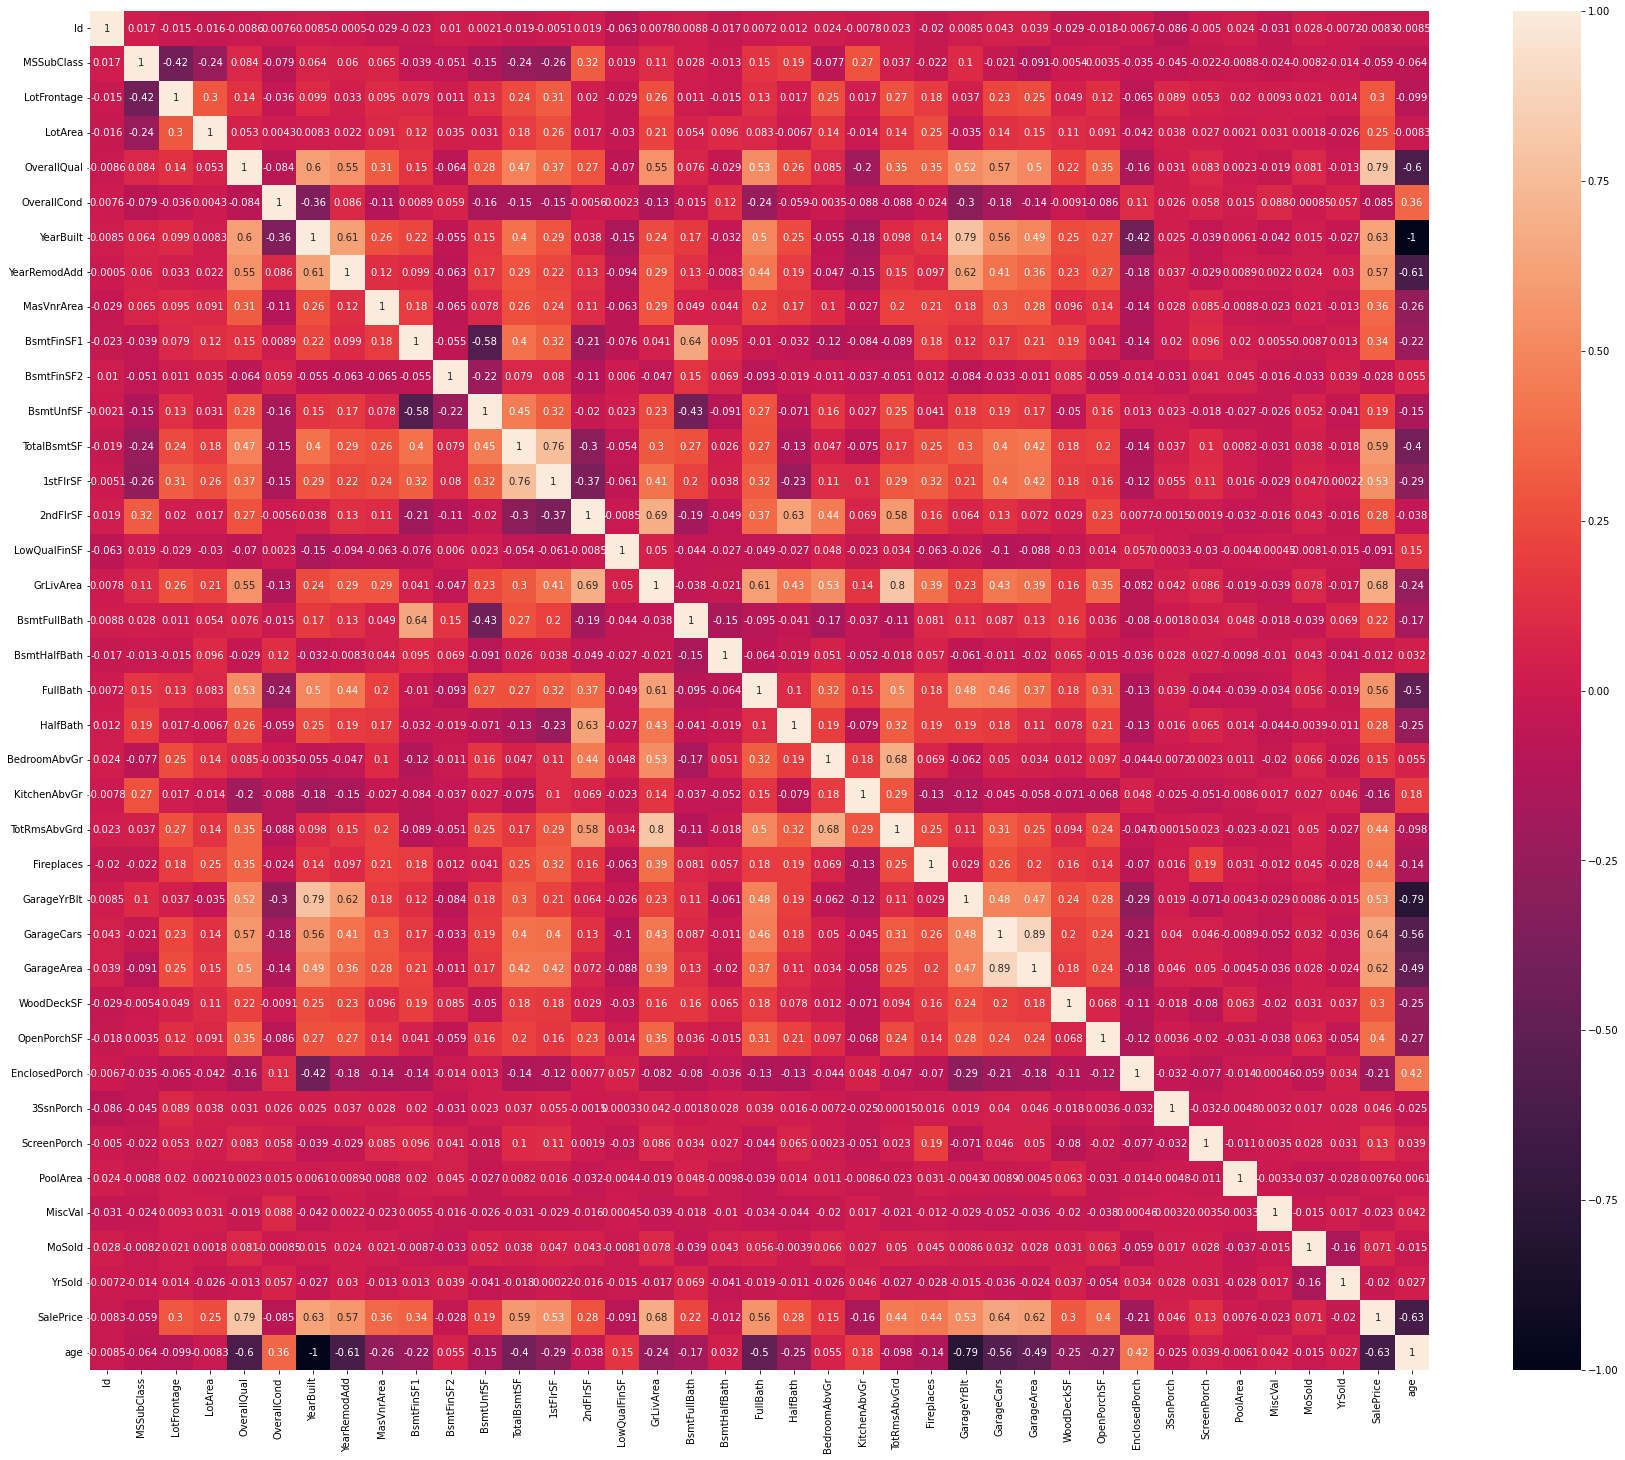

In [191]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True);

In [192]:
x,y=df.drop("SalePrice",axis=1),df[['SalePrice']]

In [193]:
x.shape,y.shape

((1221, 81), (1221, 1))

In [196]:
x=pd.get_dummies(x,drop_first=True)

In [197]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [198]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((976, 243), (245, 243), (976, 1), (245, 1))

In [199]:
x.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1459   1          60         65.0     8450            7            5   
1460   2          20         80.0     9600            6            8   
1461   3          60         68.0    11250            7            5   
1463   5          60         84.0    14260            8            5   
1464   6          50         85.0    14115            5            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1459       2003          2003       196.0       706.0         0.0      150.0   
1460       1976          1976         0.0       978.0         0.0      284.0   
1461       2001          2002       162.0       486.0         0.0      434.0   
1463       2000          2000       350.0       655.0         0.0      490.0   
1464       1993          1995         0.0       732.0         0.0       64.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1459        856.0       856       854             0       1710           1.0   
1460       1262.0      1262         0             0       1262           0.0   
1461        920.0       920       866             0       1786           1.0   
1463       1145.0      1145      1053             0       2198           1.0   
1464        796.0       796       566             0       1362           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1459           0.0         2         1             3             1   
1460           1.0         2         0             3             1   
1461           0.0         2         1             3             1   
1463           0.0         2         1             4             1   
1464           0.0         1         1             1             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
1459             8           0       2003.0         2.0       548.0   
1460             6           1       1976.0         2.0       460.0   
1461             6           1       2001.0         2.0       608.0   
1463             9           1       2000.0         3.0       836.0   
1464             5           0       1993.0         2.0       480.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1459           0           61              0          0            0   
1460         298            0              0          0            0   
1461           0           42              0          0            0   
1463         192           84              0          0            0   
1464          40           30              0        320            0   

      PoolArea  MiscVal  MoSold  YrSold  age  MSZoning_FV  MSZoning_RH  \
1459         0        0       2    2008   19            0            0   
1460         0        0       5    2007   46            0            0   
1461         0        0       9    2008   21            0            0   
1463         0        0      12    2008   22            0            0   
1464         0      700      10    2009   29            0            0   

      MSZoning_RL  MSZoning_RM  Street_Pave  Alley_Other  Alley_Pave  \
1459            1            0            1            1           0   
1460            1            0            1            1           0   
1461            1            0            1            1           0   
1463            1            0            1            1           0   
1464            1            0            1            1           0   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
1459             0             0             1                0   
1460             0             0             1                0   
1461             0             0             0                0   
1463             0             0             0                0   
1464             0             0             0                0   

      LandContour_Low  ...  KitchenQual_TA  Funct

In [200]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train) #model verinin her birimini ziyaret edip ogeniyor

In [201]:
y_pretest = regmodel.predict(x_test) # test verisinde fiyatlarini tahmin ettik

In [202]:
(mean_squared_error(y_test,y_pretest))**0.5 #karekökünü aldık **0.5 ile 

23509.92440603693

In [203]:
r2_score(y_test,y_pretest)

0.83170596487573

In [204]:
from sklearn.linear_model import Ridge,Lasso

In [205]:
R = Ridge()
R.fit(x_train,y_train)
y_pred_ridge = R.predict(x_test) 

In [206]:
(mean_squared_error(y_test,y_pred_ridge))**0.5 #karekökünü aldık **0.5 ile

21884.170894079274

In [207]:
r2_score(y_test,y_pred_ridge)

0.8541768574746403

In [208]:
#Lasso Regression

In [209]:
L = Lasso()
L.fit(x_train,y_train)
y_pred_lasso = L.predict(x_test)
y_pred_lasso

array([317957.46572233, 179805.95170707, 134979.43578177, 212217.49661391,
       138205.17874877, 152159.98038821, 119689.00915358, 138737.3044815 ,
       144043.5624917 , 125155.52544459, 273192.99816469, 144220.62314988,
        89640.07792525, 245617.8772713 , 146305.29762179, 289932.10919223,
       127134.01835413, 125214.16477271, 228858.46547765, 223544.73147496,
       155785.43275972,  66908.08759317, 143962.59153628, 131976.97869884,
       113257.70385044,  77372.06800169, 202023.51169877, 109756.31404026,
       192955.50135033, 100023.85768569, 173083.50299017, 162699.05685711,
       180019.76913245, 255153.49541884, 125193.22385213, 117701.14995391,
        92743.09151529, 193169.33810134, 132801.15615261, 205097.22745669,
       179212.62754135, 143295.66626809, 166319.65516586, 116366.52580332,
       232379.1376835 , 106066.03932894, 226644.38452049, 249706.82344713,
       181504.15141073, 201882.57211462, 285578.43543799, 204340.97825171,
        93732.37234898, 2

In [210]:
(mean_squared_error(y_test,y_pred_lasso))**0.5 #karekökünü aldık **0.5 ile 

23200.86835628919

In [211]:
r2_score(y_test,y_pred_lasso)

0.8361015909960596

In [212]:
#Elastic Net

In [213]:
from sklearn.linear_model import ElasticNet #Lasso ile Ridge'i kullanır. Hangisinin iyi yönleri varsa onları kullanır

In [214]:
E = ElasticNet(l1_ratio = .8)

In [215]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [216]:
(mean_squared_error(y_test,y_pred_elastic))**0.5 #karekökünü aldık **0.5 ile

21811.458124013683

In [217]:
r2_score(y_test,y_pred_elastic)

0.8551442772117084

In [218]:
# ExtraTreeRegressor
ETR = ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test) 

In [219]:
(mean_squared_error(y_test,y_pred_etr))**0.5  

38359.72256682889

In [220]:
r2_score(y_test,y_pred_etr)

0.5519596032753284

In [221]:
#GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [222]:
y_pred_gbr = GBR.predict(x_test)

In [223]:
(mean_squared_error(y_test,y_pred_gbr))**0.5  

20326.373849898882

In [224]:
r2_score(y_test,y_pred_gbr)

0.8741984256587043

In [225]:
#K- Neighbors  #konuma göre komsularin ev fiyatlarına bakarak fiyat tahmin ediyor 
from sklearn.neighbors import KNeighborsRegressor       
est = KNeighborsRegressor(n_neighbors = 10,weights = 'uniform')
model = est.fit(x_train,y_train)

In [226]:
y_pred_knb = model.predict(x_test)

In [227]:
y_pred_knb.shape

(245, 1)

In [228]:
(mean_squared_error(y_test,y_pred_knb))**0.5  

34648.02775837173

In [229]:
r2_score(y_test,y_pred_knb)

0.6344697736234588

In [230]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [231]:
y_pred_xgb = model.predict(x_test)

In [232]:
(mean_squared_error(y_test,y_pred_xgb))**0.5

20805.24077856661

In [233]:
r2_score(y_test,y_pred_xgb)

0.8682011106432743

In [234]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [235]:
algo_test(x,y)

R_Squared          RMSE           MAE
Ridge               0.918584  16790.062825  12104.792209
Gradient Boosting   0.913392  17317.183577  12555.240348
Lasso               0.898011  18792.094378  13324.419760
XGradientBooting    0.897112  18874.768332  13849.993431
ElasticNet          0.895116  19056.937253  13722.307830
Linear              0.893422  19210.261972  13489.089096
Extra Tree          0.746473  29628.576217  22616.261224

In [ ]:
#Ridge and Gradient Boosting > 90%
#only ExtraTree < 85%

In [236]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [237]:
y_test = np.array(list(y_test))
y_pred = np.array(pred)
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [270]:
#chart_regression(pred.flatten(),y_test.flatten())

AttributeError: 'DataFrame' object has no attribute 'flatten'

### <font color="blue">Using Deeplearning

In [239]:
#pip install keras

Note: you may need to restart the kernel to use updated packages.


In [240]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [245]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler # Transform features by scaling each feature to a given range.
scaler=MinMaxScaler()

In [246]:
x=scaler.fit_transform(x)

In [247]:
pd.DataFrame(x)

0         1         2         3         4      5         6    \
0     0.000000  0.235294  0.273292  0.045339  0.666667  0.500  0.956204   
1     0.000686  0.000000  0.366460  0.052632  0.555556  0.875  0.759124   
2     0.001372  0.235294  0.291925  0.063094  0.666667  0.500  0.941606   
3     0.002743  0.235294  0.391304  0.082181  0.777778  0.500  0.934307   
4     0.003429  0.176471  0.397516  0.081262  0.444444  0.500  0.883212   
...        ...       ...       ...       ...       ...    ...       ...   
1216  0.996571  0.000000  0.428571  0.100932  0.444444  0.500  0.978102   
1217  0.997257  0.000000  0.254658  0.039315  0.666667  0.500  0.963504   
1218  0.997942  0.235294  0.254658  0.041959  0.555556  0.500  0.927007   
1219  0.999314  0.294118  0.279503  0.049093  0.666667  1.000  0.503650   
1220  1.000000  0.000000  0.291925  0.053373  0.444444  0.625  0.569343   

           7         8         9         10        11        12        13   \
0     0.883333  0.173605  0.436072  0.000000  0.083333  0.463957  0.335907   
1     0.433333  0.000000  0.604077  0.000000  0.157778  0.684011  0.597169   
2     0.866667  0.143490  0.300185  0.000000  0.241111  0.498645  0.377091   
3     0.833333  0.310009  0.404571  0.000000  0.272222  0.620596  0.521879   
4     0.750000  0.000000  0.452131  0.000000  0.035556  0.431436  0.297297   
...        ...       ...       ...       ...       ...       ...       ...   
1216  0.933333  0.000000  0.000000  0.000000  0.633333  0.617886  0.518662   
1217  0.916667  0.000000  0.253243  0.000000  0.450556  0.661789  0.570785   
1218  0.833333  0.000000  0.000000  0.000000  0.529444  0.516531  0.398327   
1219  0.933333  0.000000  0.169858  0.000000  0.487222  0.624390  0.549550   
1220  0.766667  0.000000  0.030266  0.913043  0.000000  0.584282  0.478764   

           14   15        16        17   18        19   20        21   \
0     0.701149  0.0  0.614286  0.333333  0.0  0.666667  0.5  0.500000   
1     0.000000  0.0  0.414286  0.000000  0.5  0.666667  0.0  0.500000   
2     0.711002  0.0  0.648214  0.333333  0.0  0.666667  0.5  0.500000   
3     0.864532  0.0  0.832143  0.333333  0.0  0.666667  0.5  0.666667   
4     0.464696  0.0  0.458929  0.333333  0.0  0.333333  0.5  0.166667   
...        ...  ...       ...       ...  ...       ...  ...       ...   
1216  0.000000  0.0  0.359821  0.000000  0.0  0.333333  0.0  0.500000   
1217  0.000000  0.0  0.395982  0.333333  0.0  0.666667  0.0  0.333333   
1218  0.569787  0.0  0.586161  0.000000  0.0  0.666667  0.5  0.500000   
1219  0.945813  0.0  0.895536  0.000000  0.0  0.666667  0.0  0.666667   
1220  0.000000  0.0  0.332143  0.333333  0.0  0.333333  0.0  0.333333   

           22   23        24        25        26        27        28   \
0     0.333333  0.6  0.000000  0.936364  0.666667  0.439103  0.000000   
1     0.333333  0.4  0.333333  0.690909  0.666667  0.368590  0.776042   
2     0.333333  0.4  0.333333  0.918182  0.666667  0.487179  0.000000   
3     0.333333  0.7  0.333333  0.909091  1.000000  0.669872  0.500000   
4     0.333333  0.3  0.000000  0.845455  0.666667  0.384615  0.104167   
...        ...  ...       ...       ...       ...       ...       ...   
1216  0.333333  0.4  0.000000  0.709303  0.000000  0.000000  0.093750   
1217  0.333333  0.4  0.000000  0.945455  0.666667  0.320513  0.000000   
1218  0.333333  0.5  0.333333  0.900000  0.666667  0.368590  0.000000   
1219  0.333333  0.7  0.666667  0.372727  0.333333  0.201923  0.000000   
1220  0.333333  0.3  0.000000  0.454545  0.333333  0.192308  0.953125   

           29        30        31   32   33        34        35    36   \
0     0.285047  0.000000  0.000000  0.0  0.0  0.000000  0.090909  0.50   
1     0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.363636  0.25   
2     0.196262  0.000000  0.000000  0.0  0.0  0.000000  0.727273  0.50   
3     0.392523  0.000000  0.000000  0.0  0.0  0.000000  1.000000  0.50   
4     0.140187  0.000000  0.629921  0.0  0.0  0.0

In [251]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [262]:
model=Sequential()
model.add(Dense(1200, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [263]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=500, verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 84ms/step - loss: 30989879296.0000 - val_loss: 29457850368.0000
Epoch 2/500
8/8 [==============================] - 0s 18ms/step - loss: 29582895104.0000 - val_loss: 19304417280.0000
Epoch 3/500
8/8 [==============================] - 0s 17ms/step - loss: 8762466304.0000 - val_loss: 4972741120.0000
Epoch 4/500
8/8 [==============================] - 0s 18ms/step - loss: 4667052032.0000 - val_loss: 4411119104.0000
Epoch 5/500
8/8 [==============================] - 0s 18ms/step - loss: 2717081344.0000 - val_loss: 1795733248.0000
Epoch 6/500
8/8 [==============================] - 0s 16ms/step - loss: 1398213248.0000 - val_loss: 1475680512.0000
Epoch 7/500
8/8 [==============================] - 0s 18ms/step - loss: 1176169984.0000 - val_loss: 1435286400.0000
Epoch 8/500
8/8 [==============================] - 0s 18ms/step - loss: 920238208.0000 - val_loss: 1073669312.0000
Epoch 9/500
8/8 [==============================] - 0s 15ms/step - los

8/8 [==============================] - 0s 16ms/step - loss: 79722056.0000 - val_loss: 514182688.0000
Epoch 73/500
8/8 [==============================] - 0s 16ms/step - loss: 74809544.0000 - val_loss: 545066496.0000
Epoch 74/500
8/8 [==============================] - 0s 18ms/step - loss: 79695520.0000 - val_loss: 516767712.0000
Epoch 75/500
8/8 [==============================] - 0s 18ms/step - loss: 68302944.0000 - val_loss: 509893824.0000
Epoch 76/500
8/8 [==============================] - 0s 16ms/step - loss: 68255128.0000 - val_loss: 532325728.0000
Epoch 77/500
8/8 [==============================] - 0s 18ms/step - loss: 65117408.0000 - val_loss: 513843776.0000
Epoch 78/500
8/8 [==============================] - 0s 18ms/step - loss: 65940256.0000 - val_loss: 518896896.0000
Epoch 79/500
8/8 [==============================] - 0s 18ms/step - loss: 64027576.0000 - val_loss: 540850304.0000
Epoch 80/500
8/8 [==============================] - 0s 18ms/step - loss: 59825936.0000 - val_loss: 52

8/8 [==============================] - 0s 18ms/step - loss: 16418362.0000 - val_loss: 558629184.0000
Epoch 144/500
8/8 [==============================] - 0s 18ms/step - loss: 18109796.0000 - val_loss: 544367424.0000
Epoch 145/500
8/8 [==============================] - 0s 18ms/step - loss: 24064390.0000 - val_loss: 575696384.0000
Epoch 146/500
8/8 [==============================] - 0s 16ms/step - loss: 23654702.0000 - val_loss: 565419584.0000
Epoch 147/500
8/8 [==============================] - 0s 18ms/step - loss: 26230162.0000 - val_loss: 606241408.0000
Epoch 148/500
8/8 [==============================] - 0s 16ms/step - loss: 30450226.0000 - val_loss: 555568128.0000
Epoch 149/500
8/8 [==============================] - 0s 18ms/step - loss: 14639263.0000 - val_loss: 544846528.0000
Epoch 150/500
8/8 [==============================] - 0s 18ms/step - loss: 11390164.0000 - val_loss: 545873024.0000
Epoch 151/500
8/8 [==============================] - 0s 18ms/step - loss: 9965030.0000 - val_l

Epoch 215/500
8/8 [==============================] - 0s 18ms/step - loss: 4319833.5000 - val_loss: 562662400.0000
Epoch 216/500
8/8 [==============================] - 0s 18ms/step - loss: 4586316.5000 - val_loss: 562037248.0000
Epoch 217/500
8/8 [==============================] - 0s 16ms/step - loss: 3878656.0000 - val_loss: 574680576.0000
Epoch 218/500
8/8 [==============================] - 0s 18ms/step - loss: 4987202.0000 - val_loss: 573824704.0000
Epoch 219/500
8/8 [==============================] - 0s 16ms/step - loss: 7707549.0000 - val_loss: 585685376.0000
Epoch 220/500
8/8 [==============================] - 0s 18ms/step - loss: 14296770.0000 - val_loss: 574223552.0000
Epoch 221/500
8/8 [==============================] - 0s 15ms/step - loss: 6097723.5000 - val_loss: 564659712.0000
Epoch 222/500
8/8 [==============================] - 0s 18ms/step - loss: 3593273.5000 - val_loss: 562901824.0000
Epoch 223/500
8/8 [==============================] - 0s 18ms/step - loss: 4048520.2500 

8/8 [==============================] - 0s 18ms/step - loss: 7212993.0000 - val_loss: 569250688.0000
Epoch 287/500
8/8 [==============================] - 0s 18ms/step - loss: 7073661.0000 - val_loss: 561071616.0000
Epoch 288/500
8/8 [==============================] - 0s 16ms/step - loss: 4914770.5000 - val_loss: 564164352.0000
Epoch 289/500
8/8 [==============================] - 0s 18ms/step - loss: 3300468.5000 - val_loss: 561893888.0000
Epoch 290/500
8/8 [==============================] - 0s 16ms/step - loss: 2143952.5000 - val_loss: 562890624.0000
Epoch 291/500
8/8 [==============================] - 0s 17ms/step - loss: 2077142.2500 - val_loss: 568323520.0000
Epoch 292/500
8/8 [==============================] - 0s 18ms/step - loss: 2285229.0000 - val_loss: 567777216.0000
Epoch 293/500
8/8 [==============================] - 0s 18ms/step - loss: 4774406.0000 - val_loss: 568286400.0000
Epoch 294/500
8/8 [==============================] - 0s 16ms/step - loss: 5769852.0000 - val_loss: 563

Epoch 358/500
8/8 [==============================] - 0s 18ms/step - loss: 48441672.0000 - val_loss: 599502464.0000
Epoch 359/500
8/8 [==============================] - 0s 16ms/step - loss: 40889260.0000 - val_loss: 603891584.0000
Epoch 360/500
8/8 [==============================] - 0s 18ms/step - loss: 37124032.0000 - val_loss: 578307456.0000
Epoch 361/500
8/8 [==============================] - 0s 16ms/step - loss: 28930616.0000 - val_loss: 574607488.0000
Epoch 362/500
8/8 [==============================] - 0s 16ms/step - loss: 27225358.0000 - val_loss: 612004608.0000
Epoch 363/500
8/8 [==============================] - 0s 18ms/step - loss: 22015614.0000 - val_loss: 605841216.0000
Epoch 364/500
8/8 [==============================] - 0s 16ms/step - loss: 9672242.0000 - val_loss: 572593408.0000
Epoch 365/500
8/8 [==============================] - 0s 18ms/step - loss: 3547666.5000 - val_loss: 569684160.0000
Epoch 366/500
8/8 [==============================] - 0s 16ms/step - loss: 3170764.

8/8 [==============================] - 0s 18ms/step - loss: 5797310.0000 - val_loss: 575017344.0000
Epoch 430/500
8/8 [==============================] - 0s 16ms/step - loss: 4524424.5000 - val_loss: 567290560.0000
Epoch 431/500
8/8 [==============================] - 0s 16ms/step - loss: 3285005.0000 - val_loss: 571124032.0000
Epoch 432/500
8/8 [==============================] - 0s 18ms/step - loss: 3979397.7500 - val_loss: 574926016.0000
Epoch 433/500
8/8 [==============================] - 0s 16ms/step - loss: 2196185.0000 - val_loss: 575149568.0000
Epoch 434/500
8/8 [==============================] - 0s 18ms/step - loss: 1828119.8750 - val_loss: 575145472.0000
Epoch 435/500
8/8 [==============================] - 0s 16ms/step - loss: 3778178.5000 - val_loss: 570387008.0000
Epoch 436/500
8/8 [==============================] - 0s 17ms/step - loss: 3941844.0000 - val_loss: 570535936.0000
Epoch 437/500
8/8 [==============================] - 0s 16ms/step - loss: 5483489.0000 - val_loss: 569

8/8 [==============================] - 0s 16ms/step - loss: 22326242.0000 - val_loss: 552245568.0000


In [264]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1200)              292800    
                                                                 
 dense_34 (Dense)            (None, 1000)              1201000   
                                                                 
 dense_35 (Dense)            (None, 800)               800800    
                                                                 
 dense_36 (Dense)            (None, 600)               480600    
                                                                 
 dense_37 (Dense)            (None, 500)               300500    
                                                                 
 dense_38 (Dense)            (None, 400)               200400    
                                                                 
 dense_39 (Dense)            (None, 300)              

<AxesSubplot:>

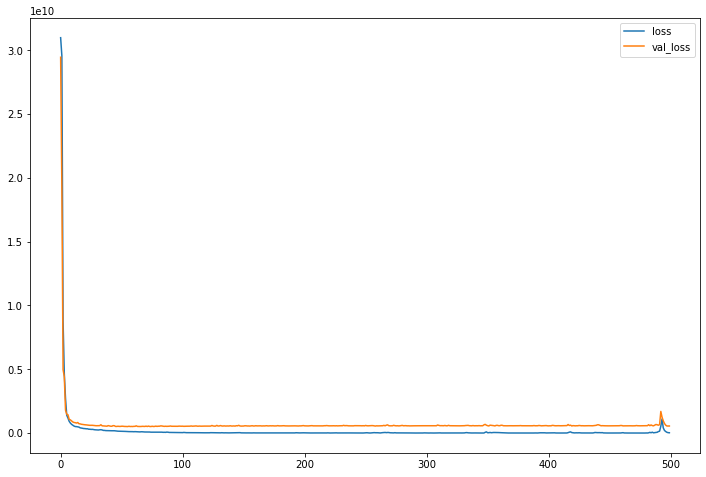

In [265]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [266]:
pred=model.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [267]:
(mean_squared_error(y_test,pred))**0.5  

23499.906106294067

In [268]:
r2_score(y_test,pred)

0.8318493648141787

In [269]:
chart_regression(y_test.flatten(),pred.flatten())

AttributeError: 'DataFrame' object has no attribute 'flatten'

InvalidIndexError: (slice(None, None, None), None)

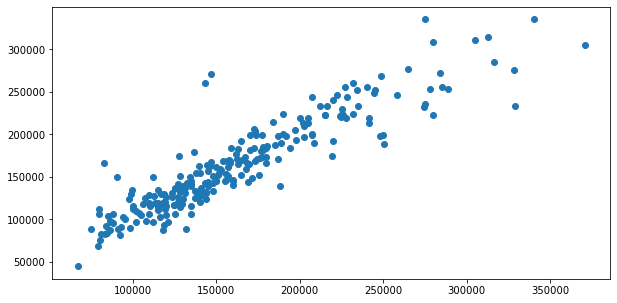

In [271]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,pred)
# Perfect predictions
plt.plot(y_test,y_test,'r');

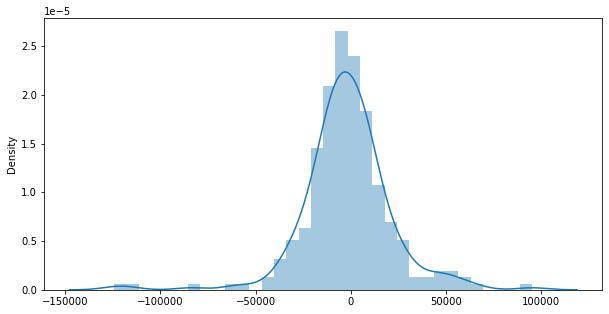

In [272]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- pred)
sns.distplot(residuals);